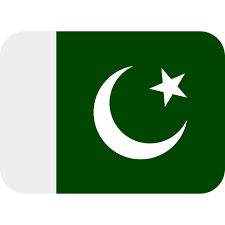



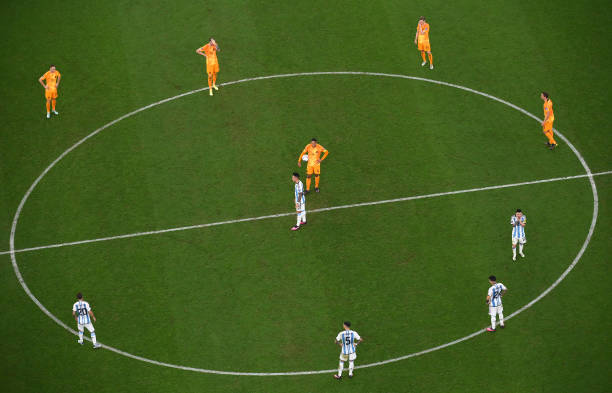


<h1>ABOUT THE DATASET</h1>
Every player available in FIFA 21 with 104 attributes.

- URL of the players from https://sofifa.com/

- URL of the uploaded player names, club and nation logos

- Player positions, with the role in the club and in the national team

- Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.

- Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.


## PROBLEM STATEMENT
<p> Football is all about fitness. The potential duration of a game is 45+45 +15+15=120 minutes. We can easily see that football players are in action for nearly two hours and a little more if they have to take penalty kicks which is the most difficult part for all players when they are extremely tired, maybe injured and under a lot of pressure.<a href="http://hdl.handle.net/123456789/7010">[1]</a></p>
    
 <p>Players with high fitness level gives excellent performance.As All messages are transmitted through brain.It has been proved scientifically that players tend to commit more mistakes when they are tired. Players miss open goal scoring chances or in one on one situations if their fitness levels are not high.<a href= "https://www.mdpi.com/1660-4601/18/16/8412">[2]</a>  Players shoot accurately if physically fit, so it has to be checked  in order to select the right player for the team.</p>

In [1]:
import numpy as np
import pandas as pd

**Data Preparation and Cleaning**

*Let's convert these csv files into pandas dataframe for our future analysis.*

We also have to check whether any null value present inside the dataframe or not before analysis.

In [2]:
fifa_df=pd.read_excel("/Users/Syed Muhammad Muneeb/Desktop/STATS Project/Career Mode player datasets - FIFA 21.xlsx")
fifa_df=fifa_df.drop(['sofifa_id','player_url','long_name','dob','team_jersey_number'],axis=1)#droping unnecessary columns
fifa_df=fifa_df.rename(columns={'short_name':'name'}) #renaming 'short_name' to name for easy use
fifa_df

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,Zhang Mengxuan,21,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,Wang Zhenghao,20,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,Chen Zitong,23,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [3]:
#Columns with NaN null values
fifa_df.columns[fifa_df.isna().any()]

Index(['club_name', 'league_name', 'league_rank', 'release_clause_eur',
       'player_tags', 'team_position', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'defending_marking'],
      dtype='object')

In [4]:
#Dropping unnecessary columns which are filled with NaN values
fifa_df=fifa_df.drop(['player_traits', 'defending_marking','release_clause_eur',
       'player_tags', 'team_position', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number','st','rs','lw','lf','cf',
        'rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','ls','cb','rcb','rb'],axis=1)
fifa_df

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,...,49,39,36,39,54,10,9,14,6,6
18940,Zhang Mengxuan,21,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,...,25,35,40,56,47,12,13,8,14,6
18941,Wang Zhenghao,20,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,...,25,35,40,55,45,12,9,14,15,13
18942,Chen Zitong,23,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,...,45,42,43,49,45,15,7,7,5,13


In [5]:
#checking for NaN values 
fifa_df.isna().any().any()

True

*isna().any().any() gives bool value 'True' that means there are some null(NaN) values.*

In [6]:
#Taking only 'club_name' columns which has proper value
fifa_df=fifa_df[fifa_df['club_name'].notna()]
fifa_df

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,...,49,39,36,39,54,10,9,14,6,6
18940,Zhang Mengxuan,21,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,...,25,35,40,56,47,12,13,8,14,6
18941,Wang Zhenghao,20,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,...,25,35,40,55,45,12,9,14,15,13
18942,Chen Zitong,23,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,...,45,42,43,49,45,15,7,7,5,13


In [7]:
#Filling remaining null values with 0
fifa_df.fillna(0)

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,...,49,39,36,39,54,10,9,14,6,6
18940,Zhang Mengxuan,21,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,...,25,35,40,56,47,12,13,8,14,6
18941,Wang Zhenghao,20,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,...,25,35,40,55,45,12,9,14,15,13
18942,Chen Zitong,23,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,...,45,42,43,49,45,15,7,7,5,13


In [8]:
for i in fifa_df.columns:
    fifa_df[i]=fifa_df[i].replace(np.nan,0)
fifa_df.isnull().values.any()

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_13552\1800786621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df[i]=fifa_df[i].replace(np.nan,0)


False

*fifa_df.isnull().values.any() gives boolean value 'False' it means there is no null value present inside the fifa_df dataframe.*

In [9]:
print('The number of rows : {}'.format(fifa_df.shape[0]))
print('The number of columns :{}'.format(fifa_df.shape[1]))

The number of rows : 18719
The number of columns :65


In [10]:
print('Countrty Wise each player list\n\n')
for country in fifa_df.nationality.unique():
    print('-'*25+country+'-'*25)
    country_df=fifa_df[['name','nationality']][fifa_df.nationality==country]
    for players in country_df.name:
        print(players)

Countrty Wise each player list


-------------------------Argentina-------------------------
L. Messi
S. Agüero
P. Dybala
A. Di María
A. Gómez
M. Icardi
L. Martínez
N. Tagliafico
G. Higuaín
E. Banega
M. Acuña
G. Lo Celso
A. Correa
G. Rulli
L. Ocampos
A. Marchesín
W. Benítez
J. Correa
E. Andrada
E. Salvio
I. Fernández
J. Musso
E. Lamela
S. Romero
E. Pérez
F. Armani
C. Pavón
L. Paredes
E. Ávila
J. Mascherano
D. Valeri
N. Guzmán
D. Perotti
N. Otamendi
D. Benedetto
M. Casco
G. Montiel
L. Martínez
E. Martínez
M. Lanzini
L. Vietto
F. Cervi
L. López
C. Tévez
J. Sosa
C. Ansaldi
I. Piatti
P. Piatti
M. Musacchio
M. Suárez
L. Acosta
G. Pezzella
R. Funes Mori
C. Izquierdoz
I. Marcone
E. Palacios
M. Senesi
E. Buendía
P. Gazzaniga
G. Escalante
R. De Paul
L. Alario
L. Biglia
F. Fazio
S. Blanco
J. Pastore
R. Pereyra
F. Fernández
F. Vázquez
R. Centurión
S. Romero
J. Buffarini
L. Martínez Quarta
M. Zaracho
A. Rossi
S. Ascacíbar
G. Simeone
F. Bustos
M. Kranevitter
G. Rodríguez
G. Martínez
J. Pinola
R. Sa

In [11]:
fifa_df.info

<bound method DataFrame.info of                     name  age  height_cm  weight_kg nationality  \
0               L. Messi   33        170         72   Argentina   
1      Cristiano Ronaldo   35        187         83    Portugal   
2               J. Oblak   27        188         87    Slovenia   
3         R. Lewandowski   31        184         80      Poland   
4              Neymar Jr   28        175         68      Brazil   
...                  ...  ...        ...        ...         ...   
18939          K. Angulo   24        176         73    Colombia   
18940     Zhang Mengxuan   21        177         70    China PR   
18941      Wang Zhenghao   20        185         74    China PR   
18942        Chen Zitong   23        186         80    China PR   
18943           Song Yue   28        185         79    China PR   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                    

In [12]:
description=fifa_df.describe()
description

,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,1.871900e+04,18719.000000,18719.000000,18719.000000,...,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000
mean,25.177787,181.190074,75.006945,1.357070,65.635023,71.089695,2.251555e+06,8780.135157,1.091832,2.935787,...,53.803943,48.018430,57.938672,47.552006,45.516320,16.415620,16.213046,16.076126,16.199583,16.527218
std,4.682187,6.819258,7.053984,0.739327,7.003908,6.112693,5.127193e+06,19749.383757,0.362167,0.666895,...,13.710659,15.658848,12.103234,21.381018,20.927713,17.547823,16.811146,16.491500,16.982050,17.848455
min,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,500.000000,1.000000,1.000000,...,9.000000,6.000000,12.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,45.000000,38.000000,50.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,...,55.000000,49.000000,59.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,8000.000000,1.000000,3.000000,...,64.000000,60.000000,66.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,5.000000,...,95.000000,92.000000,96.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


From the above description we can see >>>

The range of ages of the players is between 16 and 53

The range of weights(in kg) of the players is between 50 and 110

In [13]:
#printing all columns
for i in fifa_df.columns:
    print(i)

name
age
height_cm
weight_kg
nationality
club_name
league_name
league_rank
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_standing_tackle
defending_sliding_tackle
goalkeeping_diving
goalkeeping_handling
goalkeeping_kicking
goalkeeping_positioning
goalkeeping_reflexes


In [14]:
#First 10 rows 
fifa_df.head(10)

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,90,92,93,30,29,9,9,15,15,11
5,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,...,94,84,91,65,53,15,13,5,10,13
6,K. Mbappé,21,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,90,95,...,80,70,84,34,32,13,5,7,11,6
7,M. ter Stegen,28,187,85,Germany,FC Barcelona,Spain Primera Division,1.0,90,93,...,70,25,70,13,10,88,85,88,88,90
8,V. van Dijk,28,193,92,Netherlands,Liverpool,English Premier League,1.0,90,91,...,65,62,90,93,86,13,10,13,11,11
9,Alisson,27,191,91,Brazil,Liverpool,English Premier League,1.0,90,91,...,66,23,65,19,16,86,88,85,91,89


In [15]:
#last 10 rows
fifa_df.tail(10)

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
18934,Wang Zhen'ao,20,175,69,China PR,Dalian YiFang FC,Chinese Super League,1.0,47,57,...,46,46,45,32,42,14,12,9,8,12
18935,Xia Ao,21,178,66,China PR,Wuhan Zall,Chinese Super League,1.0,47,55,...,28,38,44,52,50,7,8,5,14,11
18936,Zhong Jiyu,23,170,62,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,55,...,46,35,43,39,45,5,13,7,13,13
18937,Wang Huapeng,20,181,77,China PR,Guangzhou R&F FC,Chinese Super League,1.0,47,53,...,33,35,37,52,55,10,15,12,8,13
18938,Huang Wenzhou,21,174,68,China PR,Shanghai SIPG FC,Chinese Super League,1.0,47,53,...,53,35,35,42,53,8,8,13,14,10
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,47,52,...,49,39,36,39,54,10,9,14,6,6
18940,Zhang Mengxuan,21,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,...,25,35,40,56,47,12,13,8,14,6
18941,Wang Zhenghao,20,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,...,25,35,40,55,45,12,9,14,15,13
18942,Chen Zitong,23,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,...,45,42,43,49,45,15,7,7,5,13
18943,Song Yue,28,185,79,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,47,...,44,36,35,43,45,8,5,11,5,7


Let's split up the fifa_df into sub-df's so that we can perform and use the df's accoridng to our need.

In [16]:
#Total number of players
print('The total number of players in FIFA21 : {}'.format(fifa_df.shape[0]))

The total number of players in FIFA21 : 18719


In [17]:
#All countries
countries_df=fifa_df.drop_duplicates(subset='nationality',keep='first')[['nationality']]
countries_df

,nationality
0,Argentina
1,Portugal
2,Slovenia
3,Poland
4,Brazil
...,...
15386,Korea DPR
16819,Hong Kong
17121,Malaysia
17179,Indonesia


In [18]:
print('Total number of countries in FIFA21 : {}'.format(countries_df.shape[0]))

Total number of countries in FIFA21 : 161


In [19]:
#Players who are goalkeepers
strickers_df=fifa_df[['name','player_positions','nationality','club_name','overall','potential']]
strickers_df=strickers_df[strickers_df['player_positions'].str.contains(pat='GK')]
strickers_df.sort_values('overall',ascending=False).head(20)

,name,player_positions,nationality,club_name,overall,potential
2,J. Oblak,GK,Slovenia,Atlético Madrid,91,93
9,Alisson,GK,Brazil,Liverpool,90,91
7,M. ter Stegen,GK,Germany,FC Barcelona,90,93
12,T. Courtois,GK,Belgium,Real Madrid,89,90
16,M. Neuer,GK,Germany,FC Bayern München,89,89
18,Ederson,GK,Brazil,Manchester City,88,91
23,S. Handanovič,GK,Slovenia,Inter,88,88
44,K. Navas,GK,Costa Rica,Paris Saint-Germain,87,87
40,W. Szczęsny,GK,Poland,Juventus,87,87
36,H. Lloris,GK,France,Tottenham Hotspur,87,87


In [20]:
#Let's check how many players are here only from England
eng_players_df=fifa_df[fifa_df.nationality=='England']
eng_players_df

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
19,R. Sterling,25,170,69,England,Manchester City,English Premier League,1.0,88,90,...,82,69,80,53,47,15,12,12,15,9
21,H. Kane,26,188,89,England,Tottenham Hotspur,English Premier League,1.0,88,89,...,83,90,91,36,38,8,10,11,14,11
28,J. Sancho,20,180,76,England,Borussia Dortmund,German 1. Bundesliga,1.0,87,93,...,87,60,84,41,32,7,11,10,11,13
29,T. Alexander-Arnold,21,180,69,England,Liverpool,English Premier League,1.0,87,92,...,84,55,81,83,79,14,15,14,6,7
56,J. Henderson,30,182,80,England,Liverpool,English Premier League,1.0,86,86,...,83,64,82,83,77,7,13,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,J. Akintunde,24,175,75,England,Derry City,Rep. Ireland Airtricity League,1.0,48,55,...,43,46,44,12,16,12,13,9,7,9
18926,L. Walker,30,196,80,England,Milton Keynes Dons,English League One,3.0,48,48,...,23,19,27,12,14,51,47,43,46,48
18928,V. Da Silva,17,171,58,England,Oldham Athletic,English League Two,4.0,47,67,...,49,50,45,11,13,11,13,9,9,6
18929,B. Hough,17,175,65,England,Oldham Athletic,English League Two,4.0,47,67,...,47,36,38,44,40,12,10,9,6,8


In [22]:
print('Total number of players from England : {}'.format(eng_players_df.shape[0]))

Total number of players from England : 1685


In [23]:
clubs_df=fifa_df[['club_name',]].drop_duplicates(subset='club_name')
clubs_df

,club_name
0,FC Barcelona
1,Juventus
2,Atlético Madrid
3,FC Bayern München
4,Paris Saint-Germain
...,...
13830,Zamora FC
14556,Shelbourne FC
14994,Harrogate Town
15150,Waterford FC


In [24]:
print('Toal Number of clubs : {}'.format(clubs_df.shape[0]))

Toal Number of clubs : 681


In [25]:
leagues_df=fifa_df[['league_name']].drop_duplicates(subset='league_name')
leagues_df

,league_name
0,Spain Primera Division
1,Italian Serie A
3,German 1. Bundesliga
4,French Ligue 1
5,English Premier League
105,Portuguese Liga ZON SAGRES
110,Holland Eredivisie
171,USA Major League Soccer
172,Chinese Super League
179,Saudi Abdul L. Jameel League


In [26]:
print('Total number of leauges : {}'.format(leagues_df.shape[0]))

Total number of leauges : 52


In [27]:
right_footed_players_df=fifa_df[['name','age','nationality','overall','club_name','preferred_foot']][fifa_df.preferred_foot=='Right']
right_footed_players_df

,name,age,nationality,overall,club_name,preferred_foot
1,Cristiano Ronaldo,35,Portugal,92,Juventus,Right
2,J. Oblak,27,Slovenia,91,Atlético Madrid,Right
3,R. Lewandowski,31,Poland,91,FC Bayern München,Right
4,Neymar Jr,28,Brazil,91,Paris Saint-Germain,Right
5,K. De Bruyne,29,Belgium,91,Manchester City,Right
...,...,...,...,...,...,...
18939,K. Angulo,24,Colombia,47,América de Cali,Right
18940,Zhang Mengxuan,21,China PR,47,Chongqing Dangdai Lifan FC SWM Team,Right
18941,Wang Zhenghao,20,China PR,47,Tianjin TEDA FC,Right
18942,Chen Zitong,23,China PR,47,Shijiazhuang Ever Bright F.C.,Right


In [28]:
print(' The total number of Right-footed players are : {}'.format(right_footed_players_df.shape[0]))

 The total number of Right-footed players are : 14279


In [29]:
left_footed_players_df=fifa_df[['name','age','nationality','overall','club_name','preferred_foot']][fifa_df.preferred_foot=='Left']
left_footed_players_df

,name,age,nationality,overall,club_name,preferred_foot
0,L. Messi,33,Argentina,93,FC Barcelona,Left
11,M. Salah,28,Egypt,90,Liverpool,Left
12,T. Courtois,28,Belgium,89,Real Madrid,Left
18,Ederson,26,Brazil,88,Manchester City,Left
22,P. Dybala,26,Argentina,88,Juventus,Left
...,...,...,...,...,...,...
18891,M. Ćoćić,17,Serbia,48,TSV 1860 München,Left
18900,D. Aravena,19,Chile,48,CD Huachipato,Left
18908,R. Fontalvo,21,Colombia,48,Junior FC,Left
18925,Song Haiwang,25,China PR,48,Henan Jianye FC,Left


In [30]:
print(' The total number of Left-footed players are : {}'.format(left_footed_players_df.shape[0]))

 The total number of Left-footed players are : 4440


In [31]:
#Let's take a random loc in fifa_df and check the data
fifa_df.loc[1224]

name                       Aurélio Buta
age                                  23
height_cm                           172
weight_kg                            72
nationality                    Portugal
                               ...     
goalkeeping_diving                    9
goalkeeping_handling                  5
goalkeeping_kicking                  13
goalkeeping_positioning               9
goalkeeping_reflexes                 10
Name: 1224, Length: 65, dtype: object

In [32]:
#Let's check how many players from Germany are here in the fifa_df
print('The total number of players from India in FIFA 21 is {}.'.format(fifa_df[fifa_df['nationality']=='Germany'].name.count()))

The total number of players from India in FIFA 21 is 1189.


In [33]:
print('The weightage of German players in FIFA 21 is {:.2f}% of all players'.format((fifa_df[fifa_df['nationality']=='Germany'].name.count()/fifa_df.shape[0])*100))

The weightage of German players in FIFA 21 is 6.35% of all players


In [34]:
#Top 10 positions of maxmium players
fifa_df.player_positions.value_counts().head(10)

player_positions
CB         2408
GK         2053
ST         1875
CDM, CM     811
CM          805
LB          764
CM, CDM     688
RB          650
CDM         343
RM          268
Name: count, dtype: int64

**Exploratory Data Analysis and Visualization**

In [23]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
import seaborn as sns
sns.set_style("darkgrid")
#matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (20, 10)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

Clustering Players by Overall and Potential Rating

In [24]:
player_highest_overall_df=fifa_df[['name','overall','potential','age','nationality','club_name','preferred_foot']].copy()
player_highest_overall_df=player_highest_overall_df.sort_values('overall',ascending=False)
player_highest_overall_df

,name,overall,potential,age,nationality,club_name,preferred_foot
0,L. Messi,93,93,33,Argentina,FC Barcelona,Left
1,Cristiano Ronaldo,92,92,35,Portugal,Juventus,Right
2,J. Oblak,91,93,27,Slovenia,Atlético Madrid,Right
3,R. Lewandowski,91,91,31,Poland,FC Bayern München,Right
4,Neymar Jr,91,91,28,Brazil,Paris Saint-Germain,Right
...,...,...,...,...,...,...,...
18932,F. Cárdenas,47,62,19,Bolivia,Club Bolívar,Right
18930,R. McKinley,47,65,18,England,Derry City,Right
18929,B. Hough,47,67,17,England,Oldham Athletic,Right
18928,V. Da Silva,47,67,17,England,Oldham Athletic,Right


In [25]:
#Top 10 players with highest overall rating
top_10_overall_df=player_highest_overall_df.head(10)
top_10_overall_df

,name,overall,potential,age,nationality,club_name,preferred_foot
0,L. Messi,93,93,33,Argentina,FC Barcelona,Left
1,Cristiano Ronaldo,92,92,35,Portugal,Juventus,Right
2,J. Oblak,91,93,27,Slovenia,Atlético Madrid,Right
3,R. Lewandowski,91,91,31,Poland,FC Bayern München,Right
4,Neymar Jr,91,91,28,Brazil,Paris Saint-Germain,Right
5,K. De Bruyne,91,91,29,Belgium,Manchester City,Right
9,Alisson,90,91,27,Brazil,Liverpool,Right
10,S. Mané,90,90,28,Senegal,Liverpool,Right
11,M. Salah,90,90,28,Egypt,Liverpool,Left
8,V. van Dijk,90,91,28,Netherlands,Liverpool,Right


In [26]:
player_highest_potential_df=fifa_df[['name','potential','overall','age','nationality','club_name','preferred_foot']].copy()
player_highest_potential_df=player_highest_potential_df.sort_values('potential',ascending=False)
player_highest_potential_df

,name,potential,overall,age,nationality,club_name,preferred_foot
6,K. Mbappé,95,90,21,France,Paris Saint-Germain,Right
0,L. Messi,93,93,33,Argentina,FC Barcelona,Left
366,Vinícius Jr.,93,80,19,Brazil,Real Madrid,Right
2,J. Oblak,93,91,27,Slovenia,Atlético Madrid,Right
272,João Félix,93,81,20,Portugal,Atlético Madrid,Right
...,...,...,...,...,...,...,...
18817,A. Foley,50,50,30,Northern Ireland,Finn Harps,Right
18884,Gao Xiang,49,49,31,China PR,Qingdao Huanghai F.C.,Right
18927,Wang Jianwen,48,48,32,China PR,Qingdao Huanghai F.C.,Right
18926,L. Walker,48,48,30,England,Milton Keynes Dons,Right


In [27]:
##Top 10 players with highest potential rating
top_10_potential_df=player_highest_potential_df.head(10)
top_10_potential_df

,name,potential,overall,age,nationality,club_name,preferred_foot
6,K. Mbappé,95,90,21,France,Paris Saint-Germain,Right
0,L. Messi,93,93,33,Argentina,FC Barcelona,Left
366,Vinícius Jr.,93,80,19,Brazil,Real Madrid,Right
2,J. Oblak,93,91,27,Slovenia,Atlético Madrid,Right
272,João Félix,93,81,20,Portugal,Atlético Madrid,Right
7,M. ter Stegen,93,90,28,Germany,FC Barcelona,Right
28,J. Sancho,93,87,20,England,Borussia Dortmund,Right
62,K. Havertz,93,85,21,Germany,Chelsea,Left
64,M. de Ligt,92,85,20,Netherlands,Juventus,Right
99,E. Haaland,92,84,19,Norway,Borussia Dortmund,Left


In [28]:
#Top 10 players with potential rating + Top 10 players with overall rating
top_10_combined_df=pd.concat([top_10_potential_df,top_10_overall_df], axis=0)
top_10_combined_df=top_10_combined_df.drop_duplicates(subset='name')
combined_df=top_10_combined_df.groupby('name')[['overall','potential']].max()
combined_df=combined_df.sort_values('overall',ascending=True)
combined_df

,overall,potential
name,,
Vinícius Jr.,80,93
João Félix,81,93
E. Haaland,84,92
M. de Ligt,85,92
K. Havertz,85,93
J. Sancho,87,93
S. Mané,90,90
M. ter Stegen,90,93
M. Salah,90,90


Bar chart of Players with Potential and Overall Rating

([<matplotlib.axis.XTick at 0x185c08a80e0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110')])

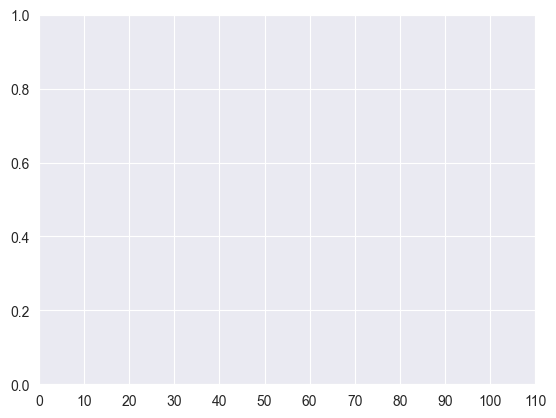

In [29]:
plt.xlim(0, 110)  # Set the x-axis limits from 0 to 110
plt.xticks(np.arange(0, 111, 10))  # Set the tick positions from 0 to 110 in steps of 10


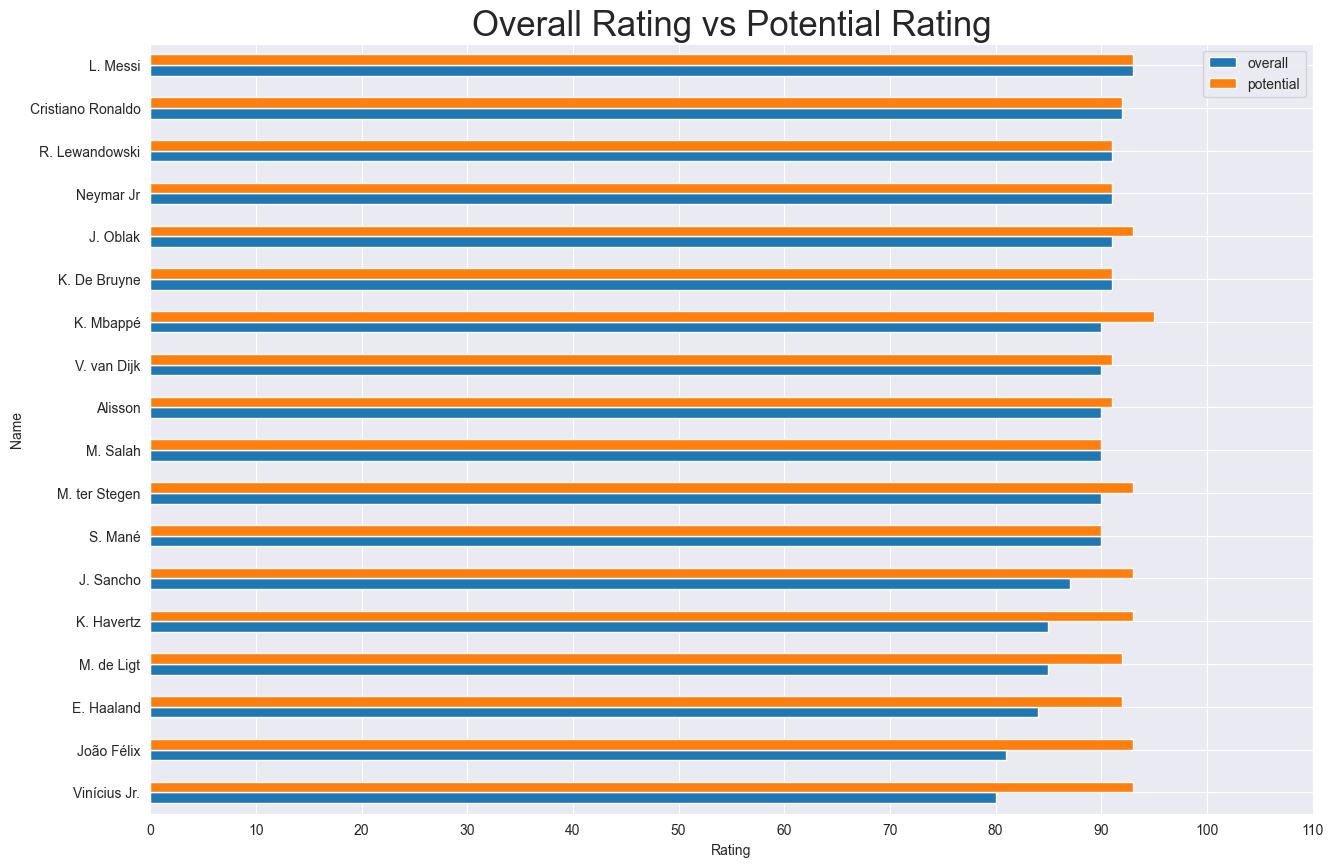

In [30]:
combined_df.plot(kind='barh', figsize=(15, 10))
plt.title('Overall Rating vs Potential Rating', fontsize=25)
plt.xlim(0, 110)  # Set the x-axis limits from 0 to 110
plt.xticks(np.arange(0, 111, 10))  # Set the tick positions from 0 to 110 in steps of 10
plt.xlabel('Rating')
plt.ylabel('Name')
plt.show()


From the barplot what can be observed is that some players have same potential and overall.It means those players are performing as they are expected to be.But the players who has more potential rating than their overall it means they can perform far way better than their overall in future.

**Players Overall and Potential Rating Distribution**

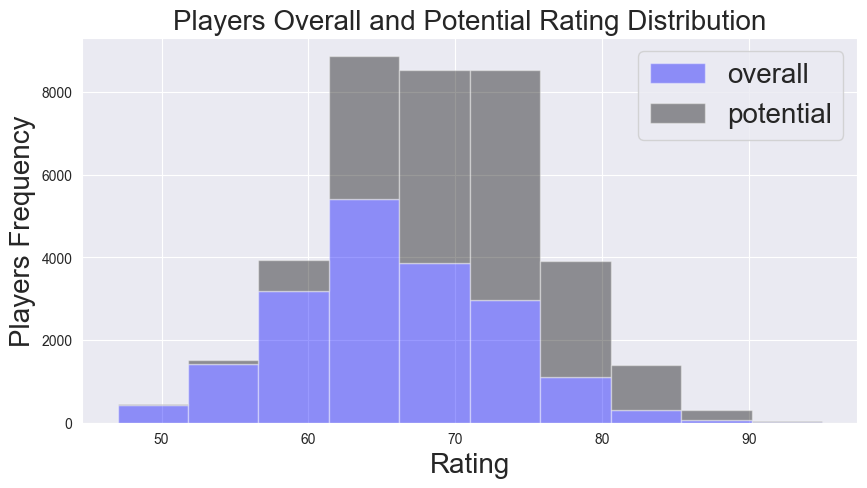

In [31]:
plt.figure(figsize=(10,5))
plt.hist([fifa_df.overall,fifa_df.potential],color=['blue','black'],alpha=0.4,stacked=True)
plt.title('Players Overall and Potential Rating Distribution',fontsize=20)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Players Frequency',fontsize=20)
plt.legend(['overall','potential'],fontsize=20);

*It is clearly shown that in each rating point, potential rating of players are more higher than overall rating.The observation is very simple, players in that rating points are not showing their 100% but in future they can perform better from their previous.*

**Clustering players By Nationality**

In [32]:
#Players number counts country wise
country_count_df=fifa_df['nationality'].value_counts()
country_count_df

nationality
England          1685
Germany          1189
Spain            1072
France            984
Argentina         936
                 ... 
Puerto Rico         1
New Caledonia       1
Bermuda             1
Chad                1
Nicaragua           1
Name: count, Length: 161, dtype: int64

It shows each country has how many players in FIFA 21.

Looks like England has the maximum number of players in FIFA 21.

**Top 20 Countries With Maximum Number of Players in FIFA 21**

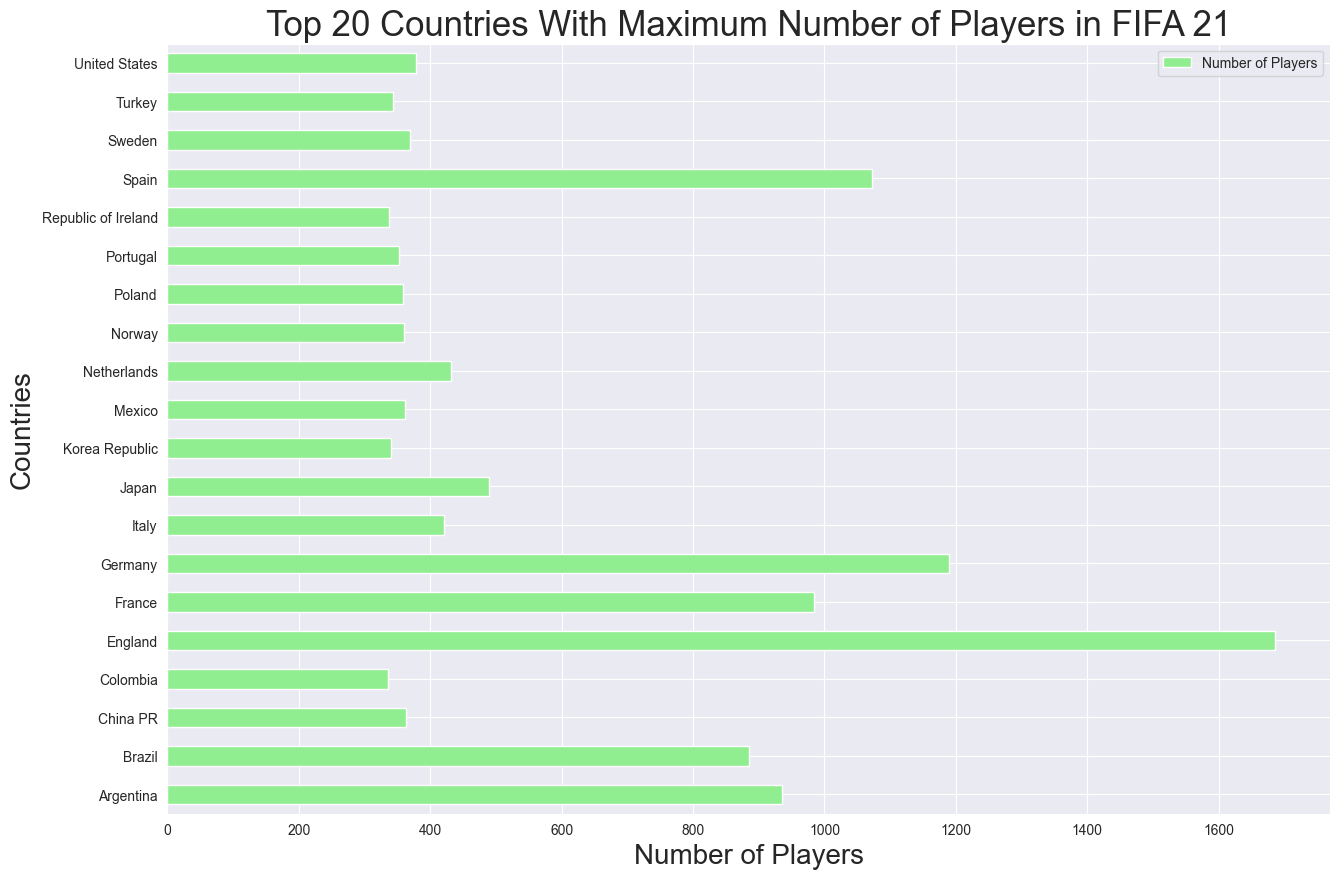

In [45]:
#Let's plot Top 20 countries with maximum number of players in FIFA 21
country_df=pd.DataFrame(country_count_df.head(20))
country_df.sort_values('nationality',ascending=True).plot(kind='barh',figsize=(15,10),color='lightgreen')
plt.title('Top 20 Countries With Maximum Number of Players in FIFA 21',fontsize=25)
plt.ylabel('Countries',fontsize=20)
plt.xlabel('Number of Players',fontsize=20)
plt.legend(['Number of Players']);

Plot shows that England,Germany and Spain are the 3 only countries which has more than 1000 players in FIFA 21.

**Clustering players by International Reputation**

In [46]:
rep_df=fifa_df[['name','international_reputation']].sort_values('international_reputation',ascending=False)
rep_df

,name,international_reputation
0,L. Messi,5
1,Cristiano Ronaldo,5
168,Z. Ibrahimović,5
16,M. Neuer,5
37,L. Suárez,5
...,...,...
7232,Y. Takahagi,1
7233,M. Johnson,1
7234,Chi Zhongguo,1
7235,L. Azcona,1


In [47]:
#Top 10 players with respect to their international reputation
rep_df.head(10)

,name,international_reputation
0,L. Messi,5
1,Cristiano Ronaldo,5
168,Z. Ibrahimović,5
16,M. Neuer,5
37,L. Suárez,5
4,Neymar Jr,5
459,Hulk,4
55,M. Hummels,4
449,Diego Costa,4
132,D. Alaba,4


So, we can see that only 6 players are on the top with maximum international reputation value of 5.

**Representation of The Distribution of International Reputation of Players in FIFA 21**

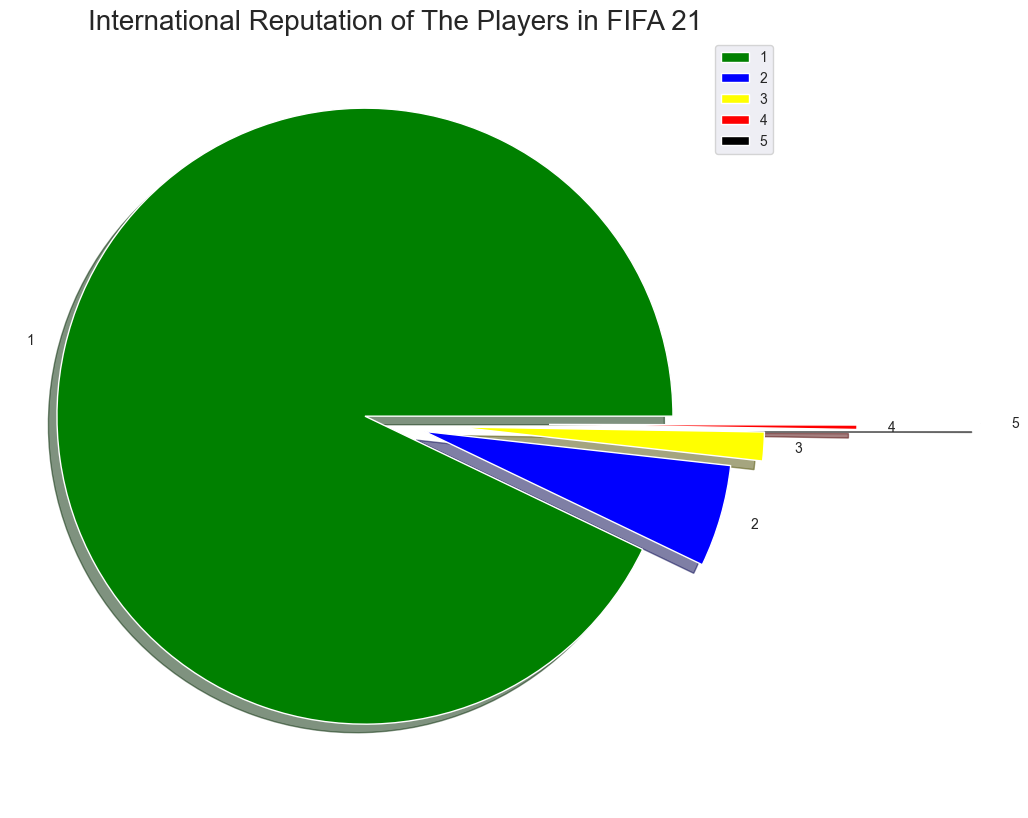

In [48]:
#Plotting a pie chart to represent the distribution of international reputation of players in FIFA 21
labels=['1','2','3','4','5']
sizes=fifa_df['international_reputation'].value_counts()
colors=['green','blue','yellow','red','black']
explode=[0.1,0.1,0.2,0.5,0.9]
plt.rcParams['figure.figsize']=(10,10)
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title('International Reputation of The Players in FIFA 21',fontsize=20)
plt.legend()
plt.show()

In [49]:
v=fifa_df['international_reputation'].value_counts()
print('Out of all players, {:.2f}% players have international reputation of 1 in FIFA 21'.format(v.iloc[0]/fifa_df.shape[0]*100))

Out of all players, 92.88% players have international reputation of 1 in FIFA 21


**Each Different Playing Positions Distribution  in FIFA 21**

In [50]:
#printing total different positions
c=0
for i in fifa_df.player_positions.unique():
    if ',' not in i:
        print(i)
        c+=1
print('\n\nTotal {} different playing positions.'.format(c))

GK
ST
CB
LW
RW
CDM
CM
RB
LB
CF
LM
RM
LWB
CAM
RWB


Total 15 different playing positions.


In [51]:
#Taking each different position players in each seperate dataframes
plis=[fifa_df[fifa_df.player_positions.str[-2:]=='GK'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='ST'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='CB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='LW'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='RW'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='CDM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='CM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='RB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='LB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='CF'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='LM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-2:]=='RM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='LWB'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='CAM'].value_counts().sum(),
fifa_df[fifa_df.player_positions.str[-3:]=='RWB'].value_counts().sum()]

In [52]:
#Storing plis list values in a dictionary
c=0
dic={}
for i in fifa_df.player_positions.unique():
    if ',' not in i:
        dic[i]=plis[c]
        c+=1
dic

{'GK': 2053,
 'ST': 2415,
 'CB': 2879,
 'LW': 574,
 'RW': 574,
 'CDM': 1440,
 'CM': 2186,
 'RB': 1194,
 'LB': 1329,
 'CF': 187,
 'LM': 1212,
 'RM': 1225,
 'LWB': 198,
 'CAM': 1063,
 'RWB': 190}

## Plotting Number of Players With Different Playing Positions

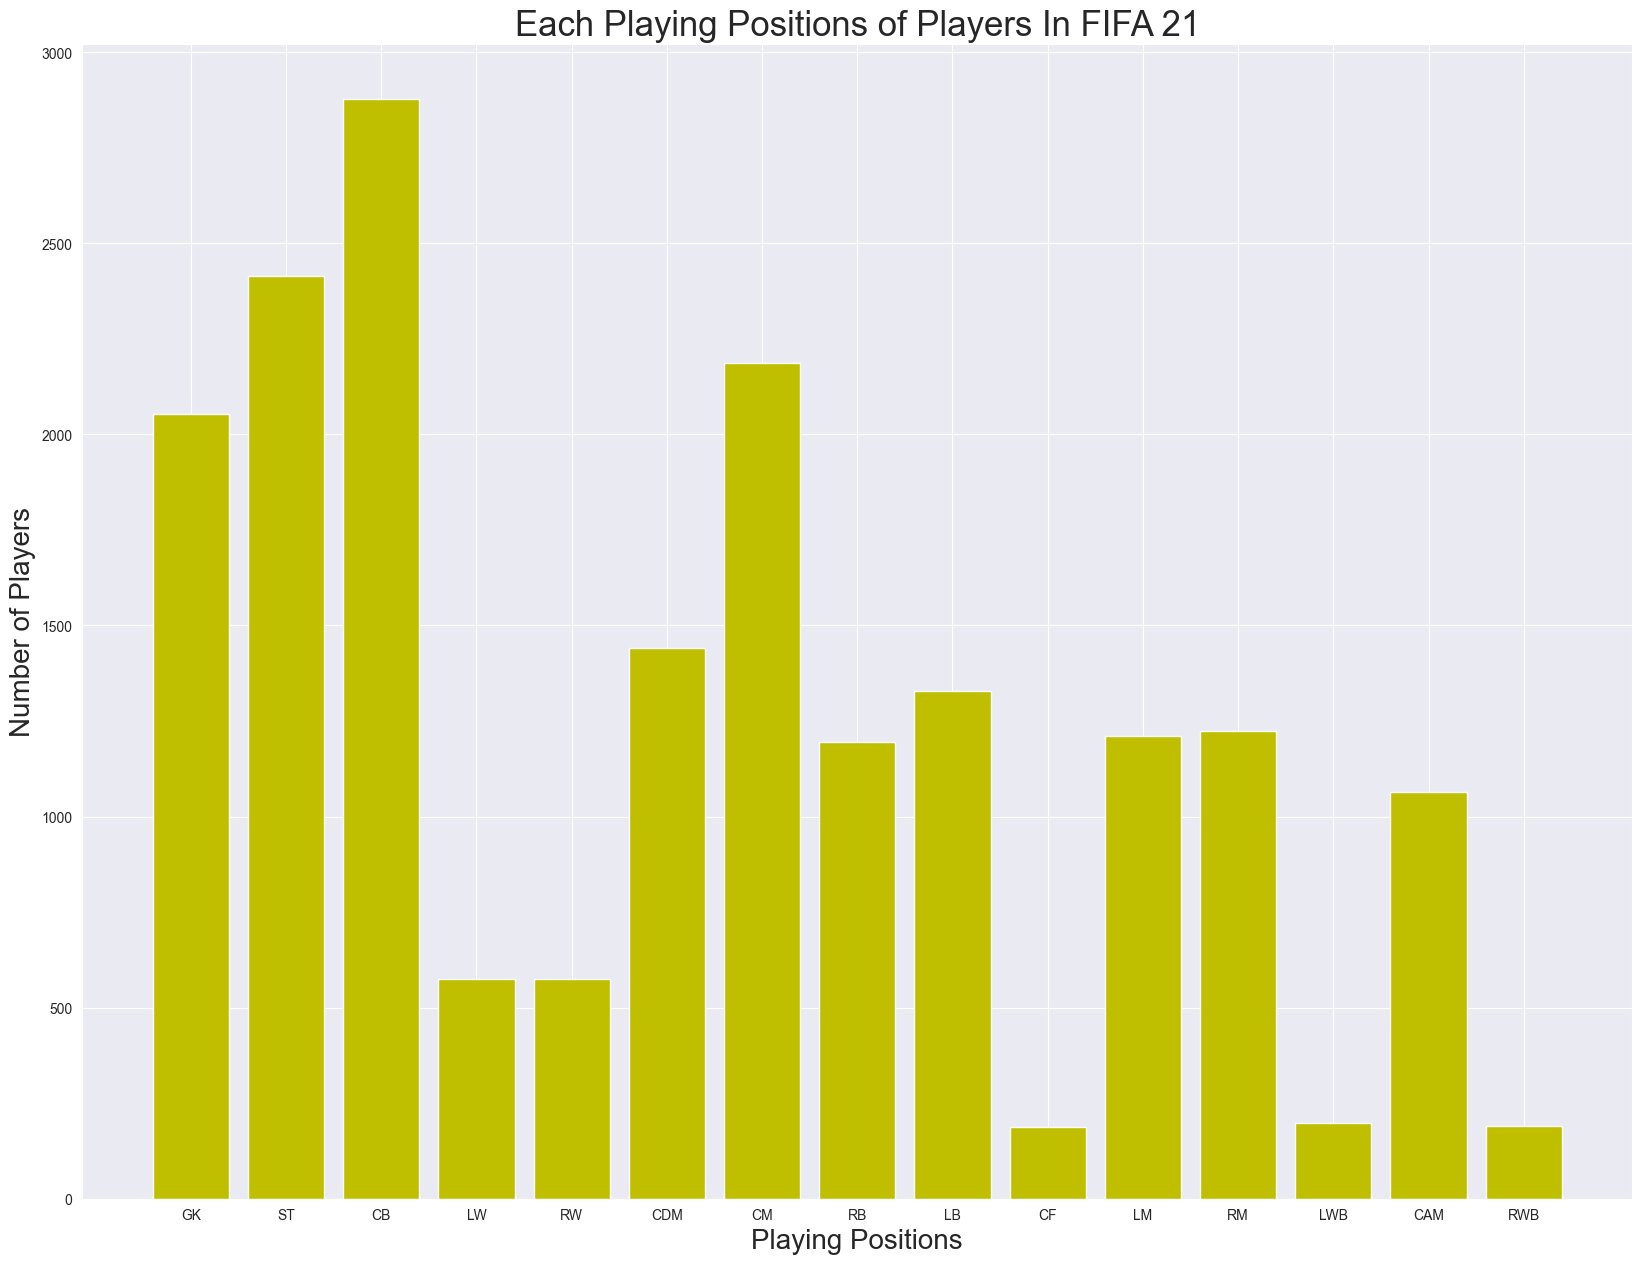

In [53]:
keys=dic.keys()
values=dic.values()
plt.figure(figsize=(20,15))
plt.xlabel('Playing Positions',fontsize=20)
plt.ylabel('Number of Players',fontsize=20)
plt.title('Each Playing Positions of Players In FIFA 21',fontsize=25)
plt.bar(keys,values,color='y')
plt.show()
#Let's plot each playing positions of Players in FIFA 21

CB is the most played position with more than 2500 players in FIFA 21.

## Top 10 Players In Each Different Playing Positions in FIFA 21

### Top 10 Goalkeepers in FIFA 21

In [54]:
#Top 10 goalkeepers in FIFA 21
gk_df=fifa_df[fifa_df.player_positions.str[-2:]=='GK'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
gk_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
2,J. Oblak,Slovenia,Atlético Madrid,188,GK,91,93
7,M. ter Stegen,Germany,FC Barcelona,187,GK,90,93
9,Alisson,Brazil,Liverpool,191,GK,90,91
12,T. Courtois,Belgium,Real Madrid,199,GK,89,90
16,M. Neuer,Germany,FC Bayern München,193,GK,89,89
18,Ederson,Brazil,Manchester City,188,GK,88,91
23,S. Handanovič,Slovenia,Inter,193,GK,88,88
36,H. Lloris,France,Tottenham Hotspur,188,GK,87,87
40,W. Szczęsny,Poland,Juventus,195,GK,87,87
44,K. Navas,Costa Rica,Paris Saint-Germain,185,GK,87,87


### Top 10 Strickers in FIFA 21

In [55]:
#Top 10 Strickers in FIFA 21
st_df=fifa_df[fifa_df.player_positions.str[-2:]=='ST'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
st_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
3,R. Lewandowski,Poland,FC Bayern München,184,ST,91,91
13,S. Agüero,Argentina,Manchester City,173,ST,89,89
15,K. Benzema,France,Real Madrid,185,"CF, ST",89,89
21,H. Kane,England,Tottenham Hotspur,188,ST,88,89
25,E. Hazard,Belgium,Real Madrid,175,"LW, ST",88,88
37,L. Suárez,Uruguay,FC Barcelona,182,ST,87,87
43,C. Immobile,Italy,Lazio,185,ST,87,87
51,A. Gómez,Argentina,Atalanta,167,"CAM, CF, ST",86,86
61,J. Vardy,England,Leicester City,179,ST,86,86
65,M. Rashford,England,Manchester United,186,"LM, ST",85,91


So,Bayern Munich front man **Robert Lewandowski** is best rated stricker in FIFA 21 (in overall and potential).

### Top 10 Centre Backs in FIFA 21

In [56]:
#Top 10 Centre Backs in FIFA 21
cb_df=fifa_df[fifa_df.player_positions.str[-2:]=='CB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
8,V. van Dijk,Netherlands,Liverpool,193,CB,90,91
14,Sergio Ramos,Spain,Real Madrid,184,CB,89,89
26,K. Koulibaly,Senegal,Napoli,187,CB,88,88
31,A. Laporte,France,Manchester City,189,CB,87,90
35,G. Chiellini,Italy,Juventus,187,CB,87,87
48,R. Varane,France,Real Madrid,191,CB,86,88
52,Piqué,Spain,FC Barcelona,194,CB,86,86
55,M. Hummels,Germany,Borussia Dortmund,191,CB,86,86
64,M. de Ligt,Netherlands,Juventus,189,CB,85,92
69,C. Lenglet,France,FC Barcelona,186,CB,85,89


**V. van Dijk** is the best Centre Back in FIFA 21.

### Top 10 Left Wing Players in FIFA 21

In [57]:
#Top 10 Left Wings in FIFA 21
lw_df=fifa_df[fifa_df.player_positions.str[-2:]=='LW'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lw_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
1,Cristiano Ronaldo,Portugal,Juventus,187,"ST, LW",92,92
10,S. Mané,Senegal,Liverpool,175,LW,90,90
39,A. Di María,Argentina,Paris Saint-Germain,180,"RW, LW",87,87
41,P. Aubameyang,Gabon,Arsenal,187,"ST, LW",87,87
45,A. Griezmann,France,FC Barcelona,176,"ST, CF, LW",87,87
108,K. Coman,France,FC Bayern München,179,"LM, RM, LW",84,88
128,Douglas Costa,Brazil,Juventus,172,"LM, RW, LW",84,84
133,Isco,Spain,Real Madrid,176,"CAM, CM, LW",84,84
187,Oscar,Brazil,Shanghai SIPG FC,179,"CAM, CM, LW",83,83
235,L. Ocampos,Argentina,Sevilla FC,188,"RW, LW",82,83


**Cristiano Ronaldo** is one of the greatest players ever to have lived - of course he's the best left winger ever.

### Top 10 Right Wingers in FIFA 21

In [58]:
#Top 10 Right Wings in FIFA 21
rw_df=fifa_df[fifa_df.player_positions.str[-2:]=='RW'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rw_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
6,K. Mbappé,France,Paris Saint-Germain,178,"ST, LW, RW",90,95
11,M. Salah,Egypt,Liverpool,175,RW,90,90
19,R. Sterling,England,Manchester City,170,"LW, RW",88,90
58,T. Müller,Germany,FC Bayern München,186,"CAM, RM, RW",86,86
76,S. Gnabry,Germany,FC Bayern München,175,"RM, LM, RW",85,87
81,H. Ziyech,Morocco,Chelsea,181,"CAM, RW",85,86
101,Oyarzabal,Spain,Real Sociedad,181,"LW, RW",84,90
129,Iago Aspas,Spain,RC Celta,176,"ST, RW",84,84
142,O. Dembélé,France,FC Barcelona,178,"LW, RW",83,89
176,G. Bale,Wales,Tottenham Hotspur,185,RW,83,83


**K. Mbappé** is on the top in rw_df on the basis of overall and potential rating.

### Top 10 Center Defensive Midfielder in FIFA 21

In [59]:
#Top 10 cdm in FIFA 21
cdm_df=fifa_df[fifa_df.player_positions.str[-3:]=='CDM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cdm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
17,Casemiro,Brazil,Real Madrid,185,CDM,89,89
32,Fabinho,Brazil,Liverpool,188,CDM,87,89
42,Sergio Busquets,Spain,FC Barcelona,189,CDM,87,87
49,P. Pogba,France,Manchester United,191,"CM, CDM",86,87
50,M. Verratti,Italy,Paris Saint-Germain,165,"CM, CDM",86,87
68,Marquinhos,Brazil,Paris Saint-Germain,183,"CB, CDM",85,89
84,M. Pjanić,Bosnia Herzegovina,FC Barcelona,178,"CM, CDM",85,85
92,Thiago,Spain,Liverpool,174,"CM, CDM",85,85
104,L. Goretzka,Germany,FC Bayern München,189,"CM, CDM",84,88
120,Fernandinho,Brazil,Manchester City,179,"CB, CDM",84,84


**Casemiro** seems to be the best center defensive midfielder in FIFA 21.

### Top 10 Center Midfielder in FIFA 21

In [60]:
#Top 10 cm in FIFA 21
cm_df=fifa_df[fifa_df.player_positions.str[-2:]=='CM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
5,K. De Bruyne,Belgium,Manchester City,181,"CAM, CM",91,91
24,T. Kroos,Germany,Real Madrid,183,CM,88,88
27,N. Kanté,France,Chelsea,168,"CDM, CM",88,88
30,Bruno Fernandes,Portugal,Manchester United,179,"CAM, CM",87,90
34,Bernardo Silva,Portugal,Manchester City,173,"RW, CAM, CM",87,88
38,L. Modrić,Croatia,Real Madrid,172,CM,87,87
53,David Silva,Spain,Real Sociedad,173,"CAM, CM",86,86
56,J. Henderson,England,Liverpool,182,"CDM, CM",86,86
67,F. de Jong,Netherlands,FC Barcelona,180,CM,85,90
74,Rodri,Spain,Manchester City,191,"CDM, CM",85,88


**K. De Bruyne** is the best center midfielder (also plays CAM)with overall and potential rating of 91.

### Top 10 Right Backs in FIFA 21

In [61]:
#Top 10 RB in FIFA 21
rb_df=fifa_df[fifa_df.player_positions.str[-2:]=='RB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
20,J. Kimmich,Germany,FC Bayern München,176,"CDM, RB",88,90
29,T. Alexander-Arnold,England,Liverpool,180,RB,87,92
60,Carvajal,Spain,Real Madrid,173,RB,86,86
77,Ricardo Pereira,Portugal,Leicester City,175,RB,85,87
91,K. Walker,England,Manchester City,183,RB,85,85
130,J. Corona,Mexico,FC Porto,173,"RM, RB",84,84
158,João Cancelo,Portugal,Manchester City,182,RB,83,86
159,Nélson Semedo,Portugal,FC Barcelona,177,RB,83,86
184,K. Trippier,England,Atlético Madrid,173,RB,83,83
221,K. Laimer,Austria,RB Leipzig,180,"CDM, CM, RB",82,86


**J. Kimmich** is the best right back but he also plays as center defensive midfielder in FIFA 21.

### Top 10 Left Backs in FIFA 21

In [62]:
#Top 10 LB in FIFA 21
lb_df=fifa_df[fifa_df.player_positions.str[-2:]=='LB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
33,A. Robertson,Scotland,Liverpool,178,LB,87,89
57,Jordi Alba,Spain,FC Barcelona,170,LB,86,86
105,Grimaldo,Spain,SL Benfica,171,LB,84,88
112,Saúl,Spain,Atlético Madrid,184,"CM, LM, LB",84,87
115,L. Digne,France,Everton,178,LB,84,85
118,Alex Telles,Brazil,FC Porto,181,LB,84,85
127,Azpilicueta,Spain,Chelsea,178,"RB, LB",84,84
132,D. Alaba,Austria,FC Bayern München,180,"CB, LB",84,84
139,N. Tagliafico,Argentina,Ajax,172,LB,84,84
143,Gayà,Spain,Valencia CF,172,LB,83,88


**A. Robertson** of Scotland is the top rated Left Back in FIFA 21.

### Top 10 Center Forwards in FIFA 21

In [63]:
#Top 10 CF in FIFA 21
cf_df=fifa_df[fifa_df.player_positions.str[-2:]=='CF'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
cf_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
0,L. Messi,Argentina,FC Barcelona,170,"RW, ST, CF",93,93
46,H. Son,Korea Republic,Tottenham Hotspur,183,"LM, CF",87,87
47,Roberto Firmino,Brazil,Liverpool,181,CF,87,87
62,K. Havertz,Germany,Chelsea,188,"CAM, RM, CF",85,93
79,Luis Alberto,Spain,Lazio,183,"CAM, CM, CF",85,86
90,M. Reus,Germany,Borussia Dortmund,180,"CAM, CF",85,85
97,L. Insigne,Italy,Napoli,163,"LW, CF",85,85
178,R. Nainggolan,Belgium,Inter,176,"CAM, CM, CF",83,83
194,W. Zaha,Ivory Coast,Crystal Palace,180,"LM, CF",83,83
200,Lucas Moura,Brazil,Tottenham Hotspur,174,"RM, CF",83,83


So, **L. Messi** is the best center forward with highest overall and potential rating of 93.

### Top 10 Left Midfielders in FIFA 21

In [64]:
#Top 10 LM in FIFA 21
lm_df=fifa_df[fifa_df.player_positions.str[-2:]=='LM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
66,L. Sané,Germany,FC Bayern München,183,LM,85,90
95,Alex Sandro,Brazil,Juventus,180,"LB, LM",85,85
96,Koke,Spain,Atlético Madrid,176,"CM, RM, LM",85,85
166,Juan Bernat,Spain,Paris Saint-Germain,170,"LB, LM",83,84
172,Renato Augusto,Brazil,Beijing Sinobo Guoan FC,186,"CM, CAM, LM",83,83
210,M. Acuña,Argentina,Sevilla FC,172,"LB, LM",83,83
212,Reguilón,Spain,Tottenham Hotspur,178,"LB, LM",82,89
265,Y. Carrasco,Belgium,Atlético Madrid,181,LM,82,82
269,R. Gosens,Germany,Atalanta,183,LM,82,82
274,H. Aouar,France,Olympique Lyonnais,175,"CM, LM",81,89


**L. Sané** is the top rated left midfielder with overall rating of 85 and potential rating of 90.

### Top 10 Right Midfielders in FIFA 21

In [65]:
#Top 10 RM in FIFA 21
rm_df=fifa_df[fifa_df.player_positions.str[-2:]=='RM'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rm_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
94,C. Eriksen,Denmark,Inter,181,"CAM, CM, RM",85,85
98,R. Mahrez,Algeria,Manchester City,179,"RW, RM",85,85
121,Jesús Navas,Spain,Sevilla FC,172,"RB, RM",84,84
141,M. Ødegaard,Norway,Real Madrid,178,"CAM, CM, RM",83,89
147,S. Bergwijn,Netherlands,Tottenham Hotspur,178,"LM, LW, RM",83,88
150,A. Hakimi,Morocco,Inter,181,RM,83,88
204,E. Višća,Bosnia Herzegovina,Medipol Başakşehir FK,172,RM,83,83
208,Rafa,Portugal,SL Benfica,172,"LM, RM",83,83
211,Ronaldo Cabrais,Brazil,Grêmio,177,"CAM, RM",83,83
227,Marcos Llorente,Spain,Atlético Madrid,184,"CM, CF, RM",82,85


Denmark's **C. Eriksen** is the top rated right midfielder with overall and potential rating of 85.

### Top 10 Left Wing Backs in FIFA 21

In [66]:
#Top 10 LWB in FIFA 21
lwb_df=fifa_df[fifa_df.player_positions.str[-3:]=='LWB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
lwb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
206,F. Kostić,Serbia,Eintracht Frankfurt,184,"LM, LWB",83,83
267,M. Halstenberg,Germany,RB Leipzig,188,"LB, CB, LWB",82,82
300,Jonny,Spain,Wolverhampton Wanderers,170,LWB,81,84
334,Marcos Alonso,Spain,Chelsea,188,"LB, LWB",81,81
417,N. Schulz,Germany,Borussia Dortmund,181,"LB, LM, LWB",80,81
424,B. Davies,Wales,Tottenham Hotspur,182,"LB, LWB",80,81
600,D. Rose,England,Tottenham Hotspur,174,"LB, LWB",79,79
663,M. Casco,Argentina,River Plate,170,"LB, LWB",79,79
693,K. Tierney,Scotland,Arsenal,178,"LB, LWB",78,86
772,S. Kolašinac,Bosnia Herzegovina,Arsenal,183,"LB, LWB",78,79


**F. Kostić** is the top rated left wing back with overall and potential rating of 83.

### Top 10 Center Attacking Midfielders in FIFA 21

In [67]:
#Top 10 CAM in FIFA 21
cam_df=fifa_df[fifa_df.player_positions.str[-3:]=='CAM'][['name','nationality','club_name','player_positions','height_cm','overall','potential']]
cam_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,player_positions,height_cm,overall,potential
4,Neymar Jr,Brazil,Paris Saint-Germain,"LW, CAM",175,91,91
22,P. Dybala,Argentina,Juventus,"CF, CAM",177,88,89
28,J. Sancho,England,Borussia Dortmund,"RM, LM, CAM",180,87,93
70,S. Milinković-Savić,Serbia,Lazio,"CM, CDM, CAM",191,85,89
72,M. Depay,Netherlands,Olympique Lyonnais,"CF, LW, CAM",176,85,88
153,D. van de Beek,Netherlands,Manchester United,"CM, CAM",184,83,87
162,M. Sabitzer,Austria,RB Leipzig,"CM, CAM",178,83,85
173,C. Vela,Mexico,Los Angeles FC,"RW, LW, CAM",177,83,83
181,A. Vidal,Chile,Inter,"CM, CDM, CAM",180,83,83
196,D. Tadić,Serbia,Ajax,"CF, LW, CAM",181,83,83


**Neymar** seems to be the top most rated center attacking midfielder with overall and potential rating of 91.

### Top 10 Right Wing Backs in FIFA 21

In [68]:
#Top 10 RWB in FIFA 21
rwb_df=fifa_df[fifa_df.player_positions.str[-3:]=='RWB'][['name','nationality','club_name','height_cm','player_positions','overall','potential']]
rwb_df.sort_values(['overall','potential'],ascending=(False,False)).head(10)

,name,nationality,club_name,height_cm,player_positions,overall,potential
149,A. Wan-Bissaka,England,Manchester United,183,"RB, RWB",83,88
368,N. Mukiele,France,RB Leipzig,187,"RB, CB, RWB",80,87
382,Héctor Bellerín,Spain,Arsenal,178,"RB, RWB",80,85
384,L. Klostermann,Germany,RB Leipzig,187,"CB, RB, RWB",80,85
476,S. Aurier,Ivory Coast,Tottenham Hotspur,174,"RB, RWB",80,80
518,Adama Traoré,Spain,Wolverhampton Wanderers,178,"RW, RWB",79,85
667,H. Traoré,Mali,Stade Rennais FC,175,"RB, RWB",79,79
686,Emerson,Brazil,Real Betis,181,"RB, RM, RWB",78,88
699,G. Montiel,Argentina,River Plate,175,"RB, RWB",78,85
778,R. Aguilar,France,AS Monaco,172,"RB, RWB",78,79


**A. Wan-Bissaka** is the top rated left wing back with overall rating of 83 and potential rating of 88.

### Top 10 Heaviest Players in FIFA 21

In [69]:
heavy_df=fifa_df.sort_values('weight_kg',ascending=False)[['name','age','nationality','club_name','overall','weight_kg']].head(10)
heavy_df

,name,age,nationality,club_name,overall,weight_kg
10345,A. Akinfenwa,38,England,Wycombe Wanderers,65,110
9188,C. Seitz,33,United States,DC United,66,107
4003,O. Oularé,24,Belgium,Standard de Liège,71,104
5126,F. Farnolle,35,Benin,BB Erzurumspor,70,104
13863,D. Corozo,32,Ecuador,Delfín SC,62,104
13491,L. Watkowiak,24,Germany,FC St. Gallen,62,103
9252,D. Telgenkamp,33,Netherlands,FC Emmen,66,103
17713,D. Turnbull,22,United States,Portsmouth,55,103
998,L. Unnerstall,29,Germany,PSV,77,103
11407,E. Johansen,27,Norway,Kristiansund BK,64,102


**A. Akinfenwa** is the heaviest player in FIFA 21 with the weight of 110 kg.

### Top 10 Hardworking Players in FIFA 21

In [70]:
w_df=fifa_df[fifa_df.work_rate=='High/High'][['name','age','nationality','player_positions','overall','potential','work_rate']].head(10)
w_df

,name,age,nationality,player_positions,overall,potential,work_rate
5,K. De Bruyne,29,Belgium,"CAM, CM",91,91,High/High
17,Casemiro,28,Brazil,CDM,89,89,High/High
21,H. Kane,26,England,ST,88,89,High/High
30,Bruno Fernandes,25,Portugal,"CAM, CM",87,90,High/High
33,A. Robertson,26,Scotland,LB,87,89,High/High
34,Bernardo Silva,25,Portugal,"RW, CAM, CM",87,88,High/High
41,P. Aubameyang,31,Gabon,"ST, LW",87,87,High/High
46,H. Son,27,Korea Republic,"LM, CF",87,87,High/High
47,Roberto Firmino,28,Brazil,CF,87,87,High/High
55,M. Hummels,31,Germany,CB,86,86,High/High


**K. De Bruyne** is no doubt the most hard-working player in FIFA 21.

### Football Leagues vs Players Frequency in FIFA 21

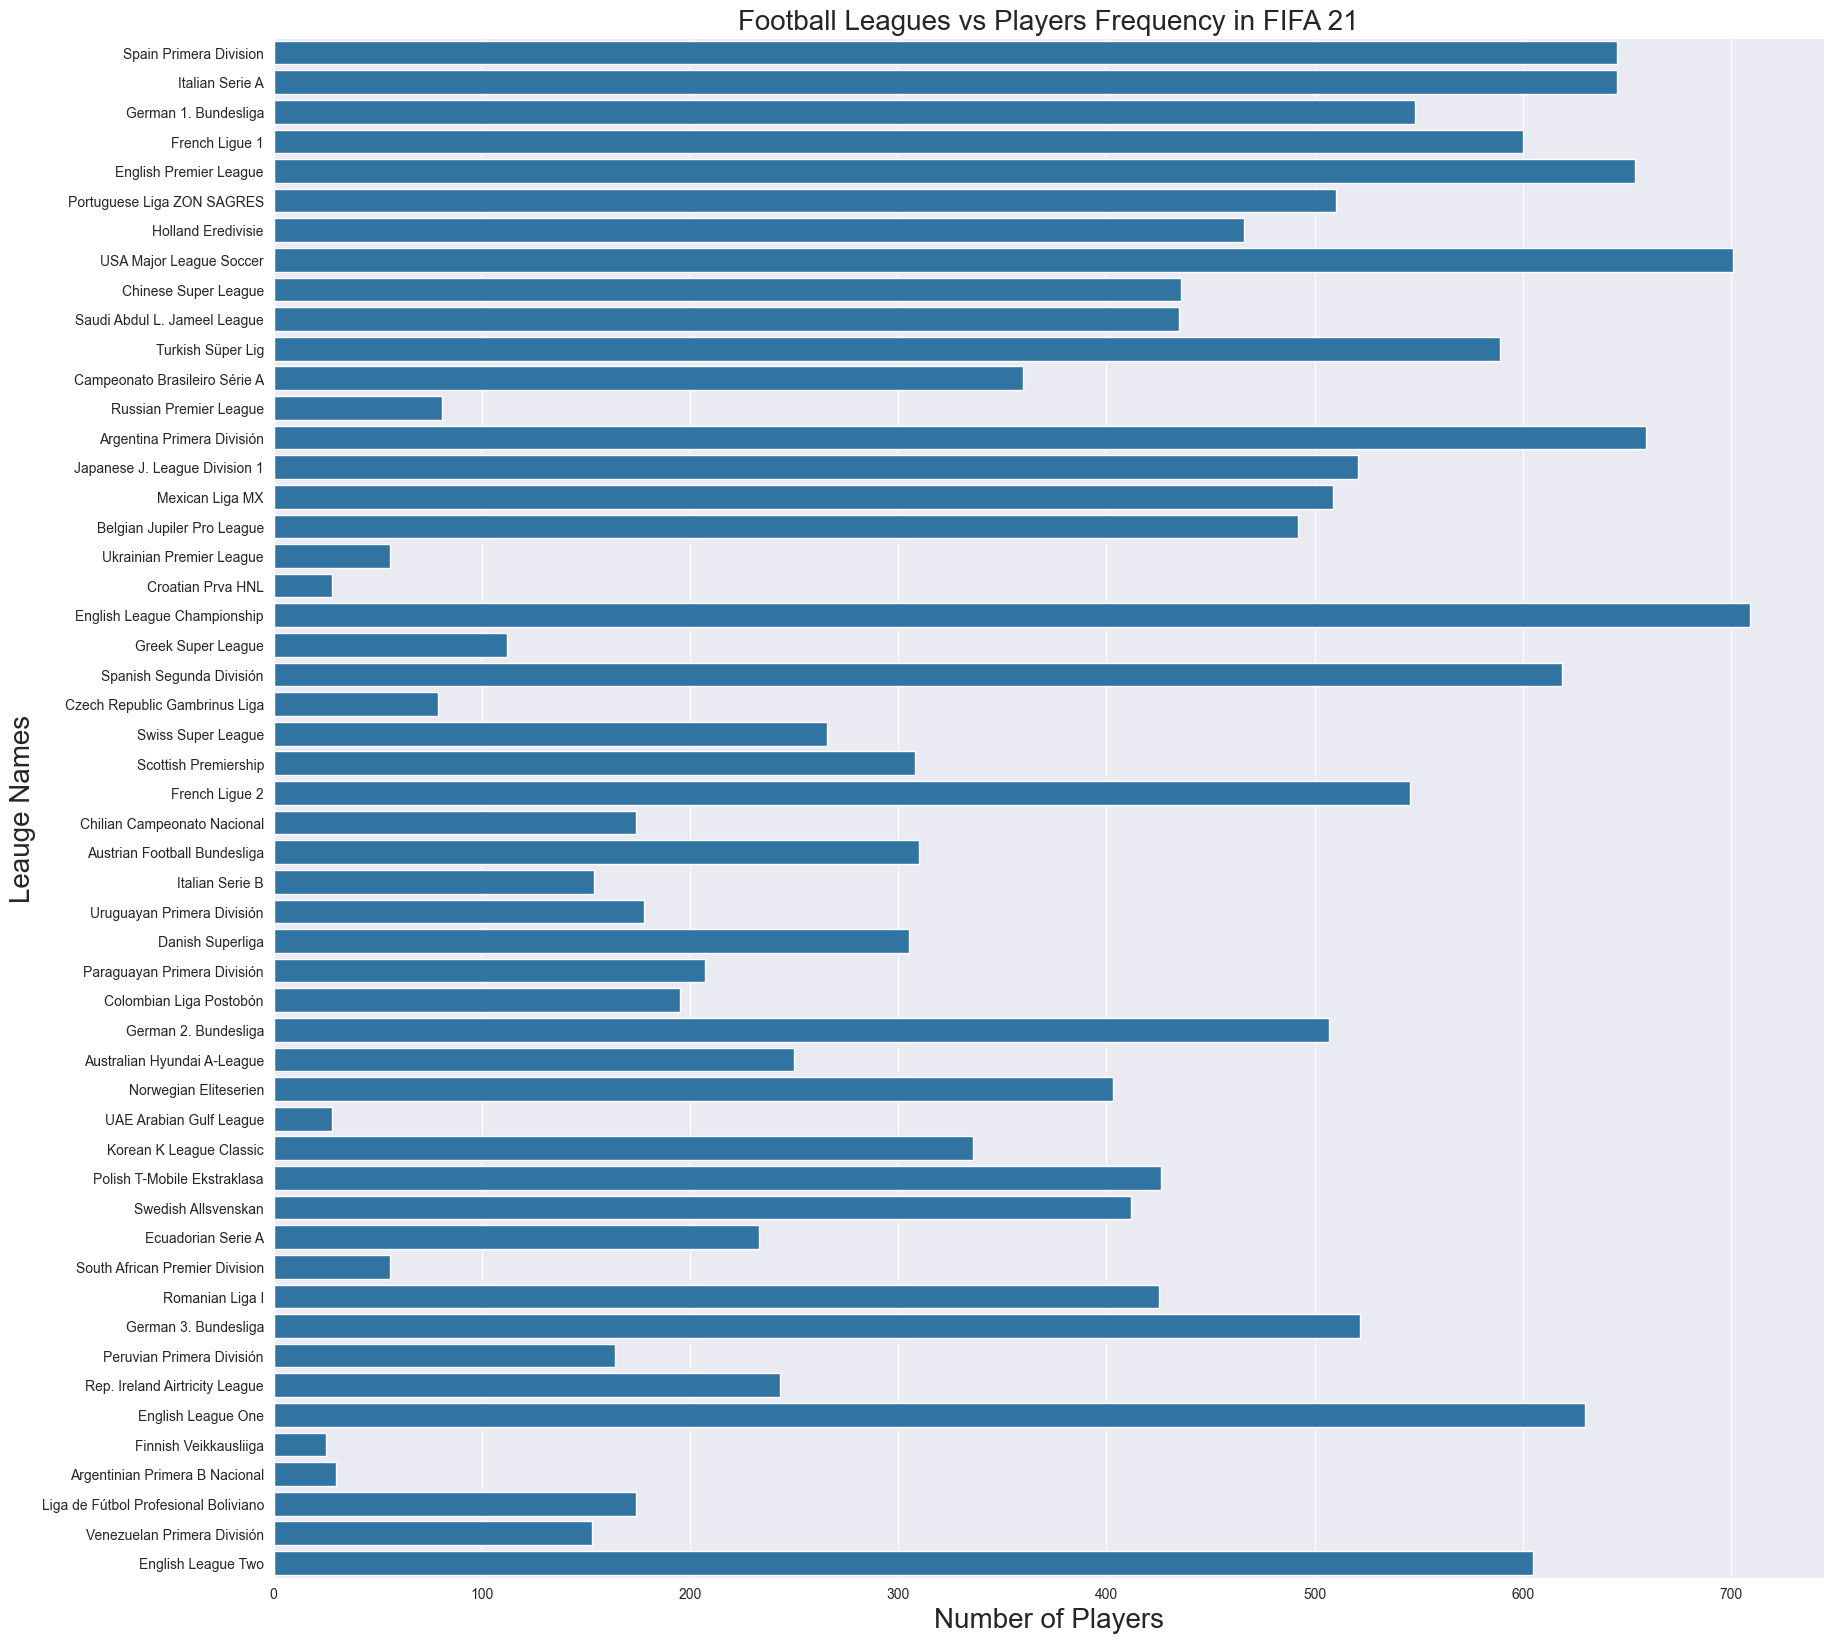

In [71]:
plt.figure(figsize=(20,20))
sns.countplot(y=fifa_df.league_name)
plt.xlabel('Number of Players',fontsize=20)
plt.ylabel('Leauge Names',fontsize=20)
plt.title('Football Leagues vs Players Frequency in FIFA 21',fontsize=20)
plt.show()

There is no certain majority but English League Championship and USA Major League Soccer are the only two leagues to have more than 1400 players from FIFA 21.

In [72]:
c=fifa_df[fifa_df.league_name=='English League Championship'].value_counts().sum()+fifa_df[fifa_df.league_name=='USA Major League Soccer'].value_counts().sum()
print('Out of {} players {} players are playing in these two leagues.'.format(fifa_df.shape[0],c))

Out of 18719 players 1410 players are playing in these two leagues.


There is no certain majority but English League Championship and USA Major League Soccer are the only two leagues to have more than 1400 players from FIFA 21.

### Top 10 Shooters in FIFA 21 

In [73]:
shooters_df=fifa_df.sort_values('shooting',ascending=False)[['name','age','nationality','club_name','overall','shooting']].head(10)
shooters_df['shooting']=shooters_df['shooting'].astype(int)
shooters_df

,name,age,nationality,club_name,overall,shooting
1,Cristiano Ronaldo,35,Portugal,Juventus,92,93
0,L. Messi,33,Argentina,FC Barcelona,93,92
3,R. Lewandowski,31,Poland,FC Bayern München,91,91
21,H. Kane,26,England,Tottenham Hotspur,88,91
13,S. Agüero,32,Argentina,Manchester City,89,90
37,L. Suárez,33,Uruguay,FC Barcelona,87,90
43,C. Immobile,30,Italy,Lazio,87,88
168,Z. Ibrahimović,38,Sweden,Milan,83,88
99,E. Haaland,19,Norway,Borussia Dortmund,84,87
46,H. Son,27,Korea Republic,Tottenham Hotspur,87,86


### Top 10 Fastest Players in FIFA 21

In [74]:
fastest_players_df=fifa_df.sort_values(['pace','movement_acceleration','movement_sprint_speed'],ascending=(False,False,False))[['name','age','nationality','club_name','overall','movement_acceleration','movement_sprint_speed','pace']].head(10)
fastest_players_df['pace']=fastest_players_df['pace'].astype(int)
fastest_players_df

,name,age,nationality,club_name,overall,movement_acceleration,movement_sprint_speed,pace
518,Adama Traoré,24,Spain,Wolverhampton Wanderers,79,97,96,96
6,K. Mbappé,21,France,Paris Saint-Germain,90,96,96,96
273,A. Davies,19,Canada,FC Bayern München,81,96,96,96
933,D. James,22,Wales,Manchester United,77,96,95,95
366,Vinícius Jr.,19,Brazil,Real Madrid,80,95,95,95
5564,A. Chalá,24,Ecuador,Dijon FCO,69,93,96,95
690,I. Sarr,22,Senegal,Watford,78,95,94,94
10,S. Mané,28,Senegal,Liverpool,90,95,93,94
1581,C. Ejuke,22,Nigeria,PFC CSKA Moscow,75,95,93,94
409,Gelson Martins,25,Portugal,AS Monaco,80,94,94,94


**Adama Traoré** is the fastest player in FIFA 21.

### Count Plotting Players On The Basis of Their Heights

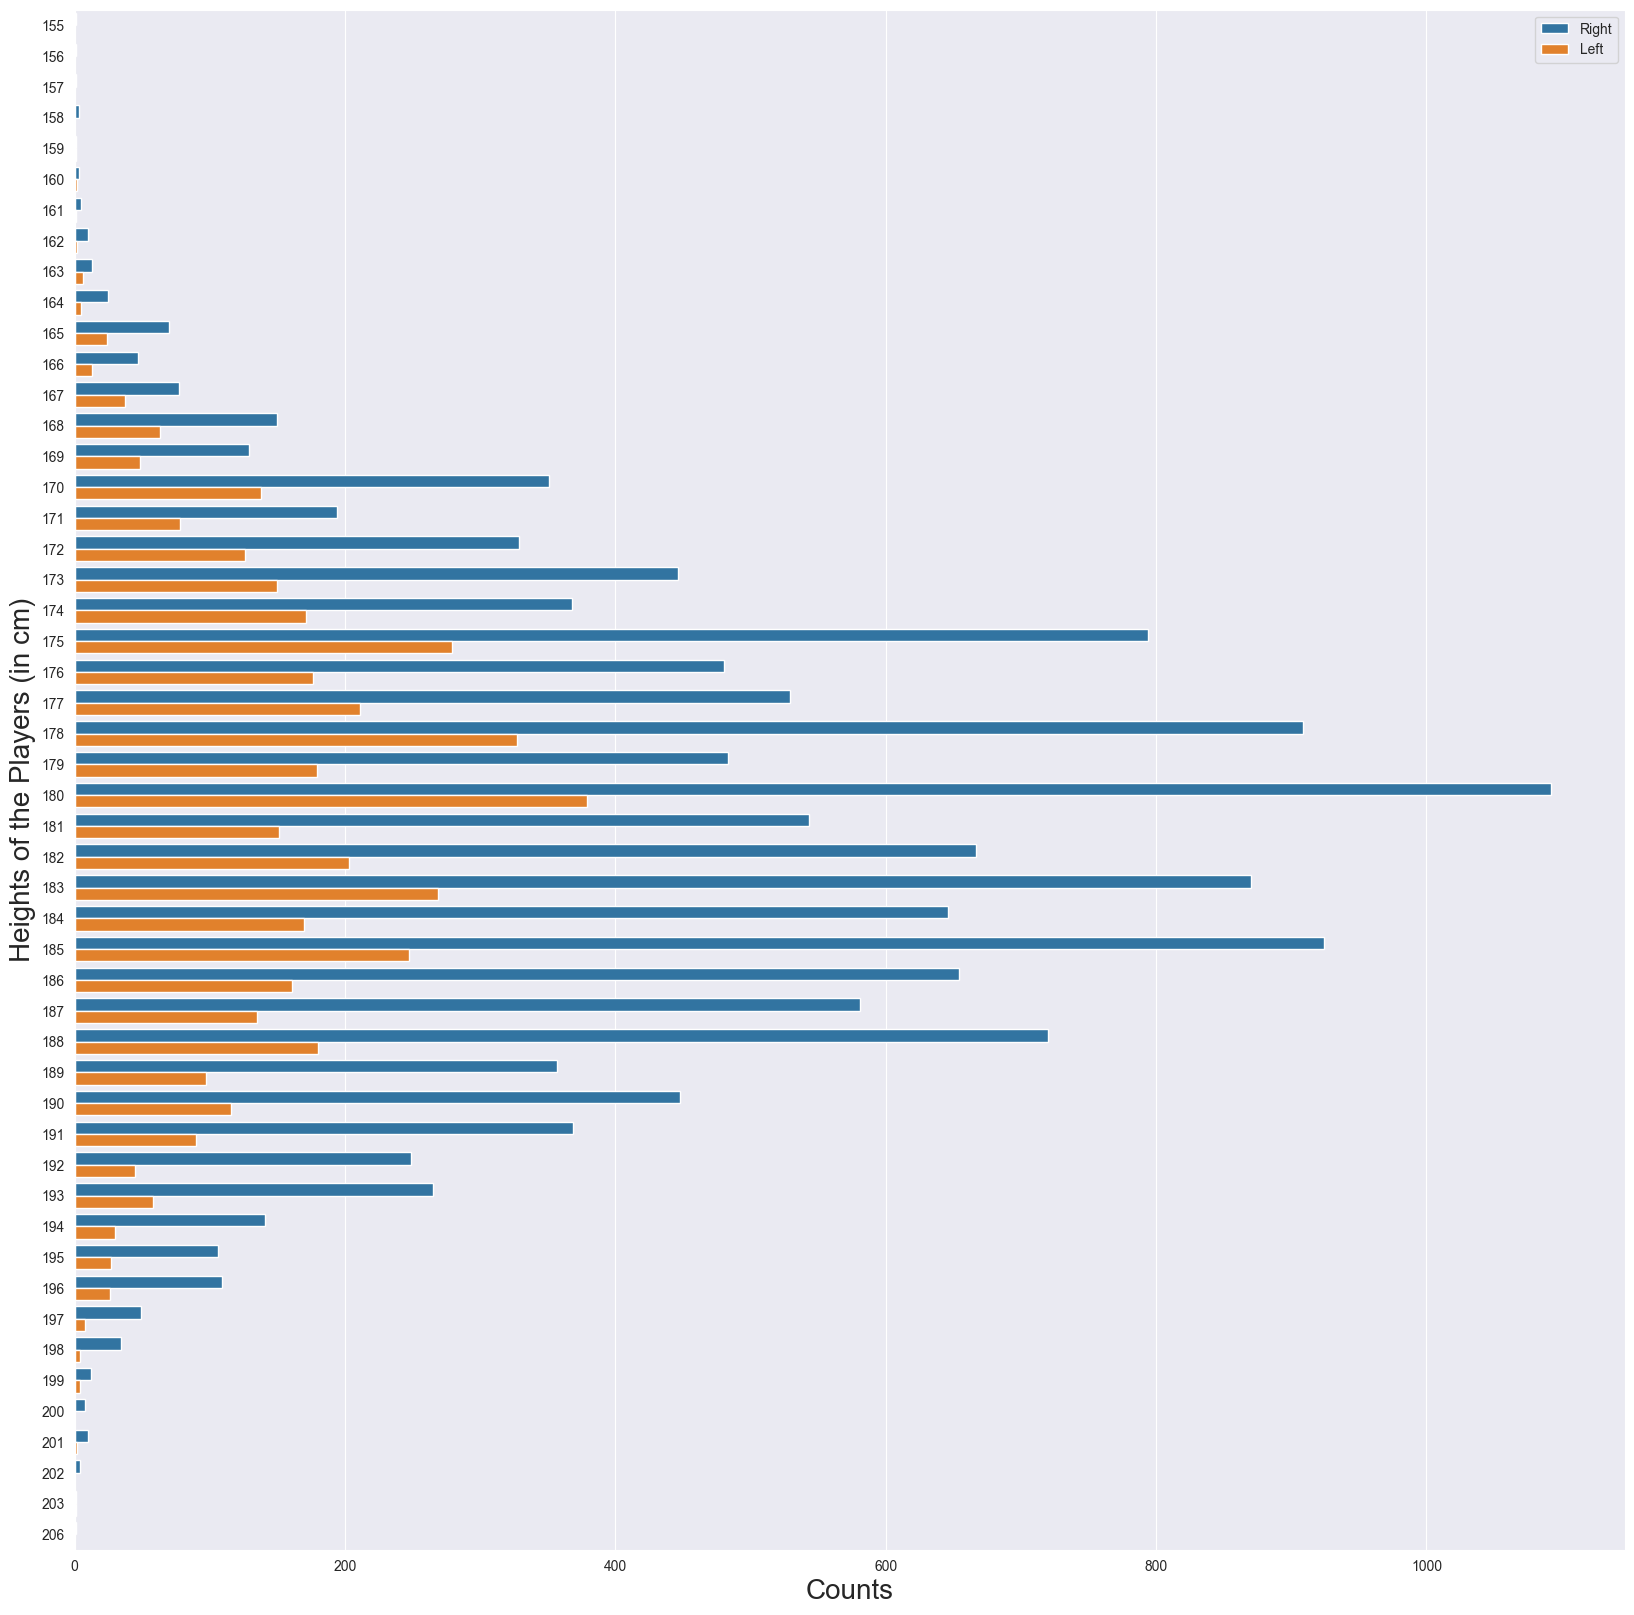

In [75]:
plt.figure(figsize=(20,20))
sns.countplot(y='height_cm',hue='preferred_foot',data=fifa_df);
plt.ylabel('Heights of the Players (in cm)',fontsize=20)
plt.xlabel('Counts',fontsize=20);
plt.legend(fontsize=10);
plt.show()

Observation - <br>
In FIFA 21 there are more than 1000 players with the height 180 cm.<br>
The plot also clearly shows majority r-footed players are more taller than the l-footed players in maximum specific height points.

### Finding Out Players With Maximum Wage(in euro)

In [76]:
max_wage_df=fifa_df.sort_values('wage_eur',ascending=False)[['name','nationality','age','overall','club_name','wage_eur']]
max_wage_df

,name,nationality,age,overall,club_name,wage_eur
0,L. Messi,Argentina,33,93,FC Barcelona,560000
5,K. De Bruyne,Belgium,29,91,Manchester City,370000
15,K. Benzema,France,32,89,Real Madrid,350000
25,E. Hazard,Belgium,29,88,Real Madrid,350000
17,Casemiro,Brazil,28,89,Real Madrid,310000
...,...,...,...,...,...,...
16033,G. Orellana,Chile,33,59,Coquimbo Unido,500
7110,A. Kochenkov,Russia,33,68,Lokomotiv Moscow,500
11840,J. Alvez,Uruguay,36,64,Centro Atlético Fénix,500
11839,L. Cabral,Paraguay,36,64,Nacional Asunción,500


### Top 10 Players With Maximum Wage in FIFA 21

In [77]:
#Lets find out top 10 players with maximum wage(in euros)
max_wage_df.head(10)

,name,nationality,age,overall,club_name,wage_eur
0,L. Messi,Argentina,33,93,FC Barcelona,560000
5,K. De Bruyne,Belgium,29,91,Manchester City,370000
15,K. Benzema,France,32,89,Real Madrid,350000
25,E. Hazard,Belgium,29,88,Real Madrid,350000
17,Casemiro,Brazil,28,89,Real Madrid,310000
24,T. Kroos,Germany,30,88,Real Madrid,310000
13,S. Agüero,Argentina,32,89,Manchester City,300000
14,Sergio Ramos,Spain,34,89,Real Madrid,300000
45,A. Griezmann,France,29,87,FC Barcelona,290000
37,L. Suárez,Uruguay,33,87,FC Barcelona,280000


### Finding Out Players With Maximum Value(in euro)

In [78]:
max_val_df=fifa_df.sort_values('value_eur',ascending=False)[['name','nationality','age','overall','club_name','value_eur']]
max_val_df

,name,nationality,age,overall,club_name,value_eur
6,K. Mbappé,France,21,90,Paris Saint-Germain,105500000
4,Neymar Jr,Brazil,28,91,Paris Saint-Germain,90000000
5,K. De Bruyne,Belgium,29,91,Manchester City,87000000
3,R. Lewandowski,Poland,31,91,FC Bayern München,80000000
10,S. Mané,Senegal,28,90,Liverpool,78000000
...,...,...,...,...,...,...
16065,K. Miura,Japan,53,59,Yokohama FC,0
6920,Y. Endo,Japan,40,68,Gamba Osaka,0
1026,Hilton,Brazil,42,77,Montpellier HSC,0
11701,H. Sulaimani,Saudi Arabia,43,64,Al Ahli,0


### Top 10 Valuable Players in FIFA 21

In [79]:
max_val_df.head(10)

,name,nationality,age,overall,club_name,value_eur
6,K. Mbappé,France,21,90,Paris Saint-Germain,105500000
4,Neymar Jr,Brazil,28,91,Paris Saint-Germain,90000000
5,K. De Bruyne,Belgium,29,91,Manchester City,87000000
3,R. Lewandowski,Poland,31,91,FC Bayern München,80000000
10,S. Mané,Senegal,28,90,Liverpool,78000000
11,M. Salah,Egypt,28,90,Liverpool,78000000
8,V. van Dijk,Netherlands,28,90,Liverpool,75500000
2,J. Oblak,Slovenia,27,91,Atlético Madrid,75000000
19,R. Sterling,England,25,88,Manchester City,72500000
22,P. Dybala,Argentina,26,88,Juventus,71000000


###  Distributions of Players In Different Age Groups

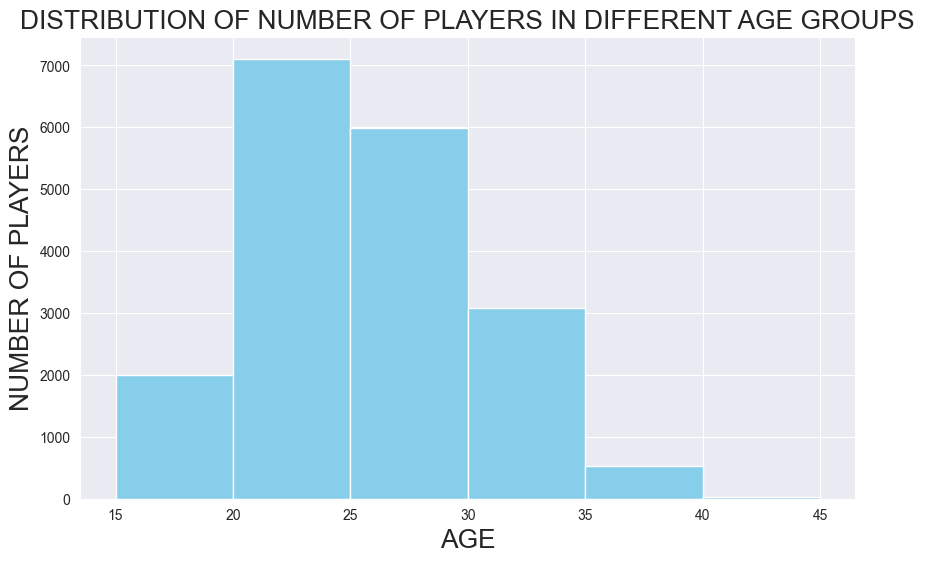

In [80]:
#Illustrating number of players in different age groups  through histogram 
plt.figure(figsize=(10, 6))
plt.title('DISTRIBUTION OF NUMBER OF PLAYERS IN DIFFERENT AGE GROUPS',fontsize=19)
plt.xlabel('AGE',fontsize=19)
plt.ylabel('NUMBER OF PLAYERS',fontsize=19)
plt.hist(fifa_df.age, bins=np.arange(15,50,5), color='skyblue');

Through this plot we can see that more than 7000 players in FIFA 21 are in the age group between 20-25.

### Players Overall  and Potential Rating  vs Age in FIFA 21

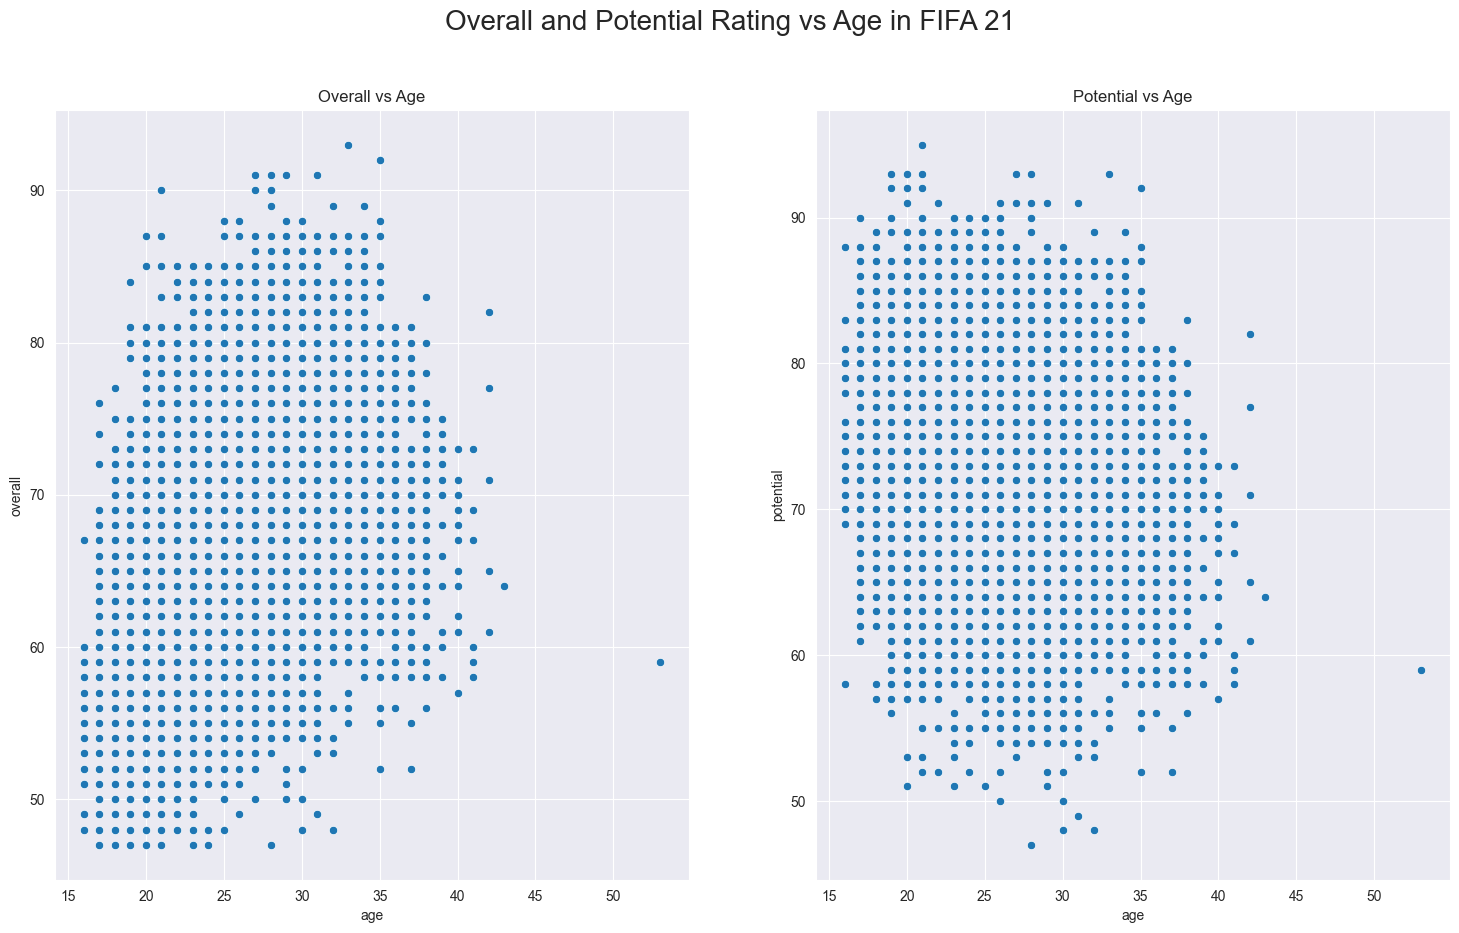

In [81]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,10))
fig.suptitle('Overall and Potential Rating vs Age in FIFA 21',fontsize=20)
axes[0].set_title('Overall vs Age')
axes[1].set_title('Potential vs Age')
sns.scatterplot(ax=axes[0],x=fifa_df.age,y=fifa_df.overall);
sns.scatterplot(x=fifa_df.age,y=fifa_df.potential);

__From the plot what we can say is that here is no single player in age group 36-50  with the overall rating of more than 85.__<br>
__The players who lies in the age group of 25-35 has the the maximum number of overall rating.__<br>
__The under 19 players have more potential than their overall.__<br>

## Top 15 Players Key Performance Indication in FIFA 21

In [82]:
fifa_df['mentality']=(fifa_df['mentality_aggression']+fifa_df['mentality_interceptions']+fifa_df['mentality_positioning']+fifa_df['mentality_vision']+fifa_df['mentality_penalties']+fifa_df['mentality_composure'])//6
fifa_df['skill']=(fifa_df['skill_dribbling']+fifa_df['skill_curve']+fifa_df['skill_fk_accuracy']+fifa_df['skill_long_passing']+fifa_df['skill_ball_control'])//5
fifa_df['power']=(fifa_df['power_shot_power']+fifa_df['power_jumping']+fifa_df['power_stamina']+fifa_df['power_strength']+fifa_df['power_long_shots'])//5
fifa_df['attacking']=(fifa_df['attacking_crossing']+fifa_df['attacking_finishing']+fifa_df['attacking_heading_accuracy']+fifa_df['attacking_short_passing']+fifa_df['attacking_volleys'])//5
fifa_df['movement']=(fifa_df['movement_balance']+fifa_df['movement_reactions']+fifa_df['movement_agility']+fifa_df['movement_sprint_speed']+fifa_df['movement_acceleration'])//5

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22172\4200336657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['mentality']=(fifa_df['mentality_aggression']+fifa_df['mentality_interceptions']+fifa_df['mentality_positioning']+fifa_df['mentality_vision']+fifa_df['mentality_penalties']+fifa_df['mentality_composure'])//6
C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_22172\4200336657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['skill']=(fifa_df['skill_dribbli

In [83]:
top_15_players_df=fifa_df.sort_values('overall',ascending=False)[['name','overall','mentality','skill','dribbling','physic','defending','power','attacking','movement']].head(15)

In [84]:
top_15_players_df['dribbling'] = top_15_players_df['dribbling'].fillna(0).astype(int)
top_15_players_df['physic'] = top_15_players_df['physic'].fillna(0).astype(int)
top_15_players_df['defending'] = top_15_players_df['defending'].fillna(0).astype(int)


In [85]:
top_15_players_df.dropna(subset=['dribbling', 'physic', 'defending'], inplace=True)


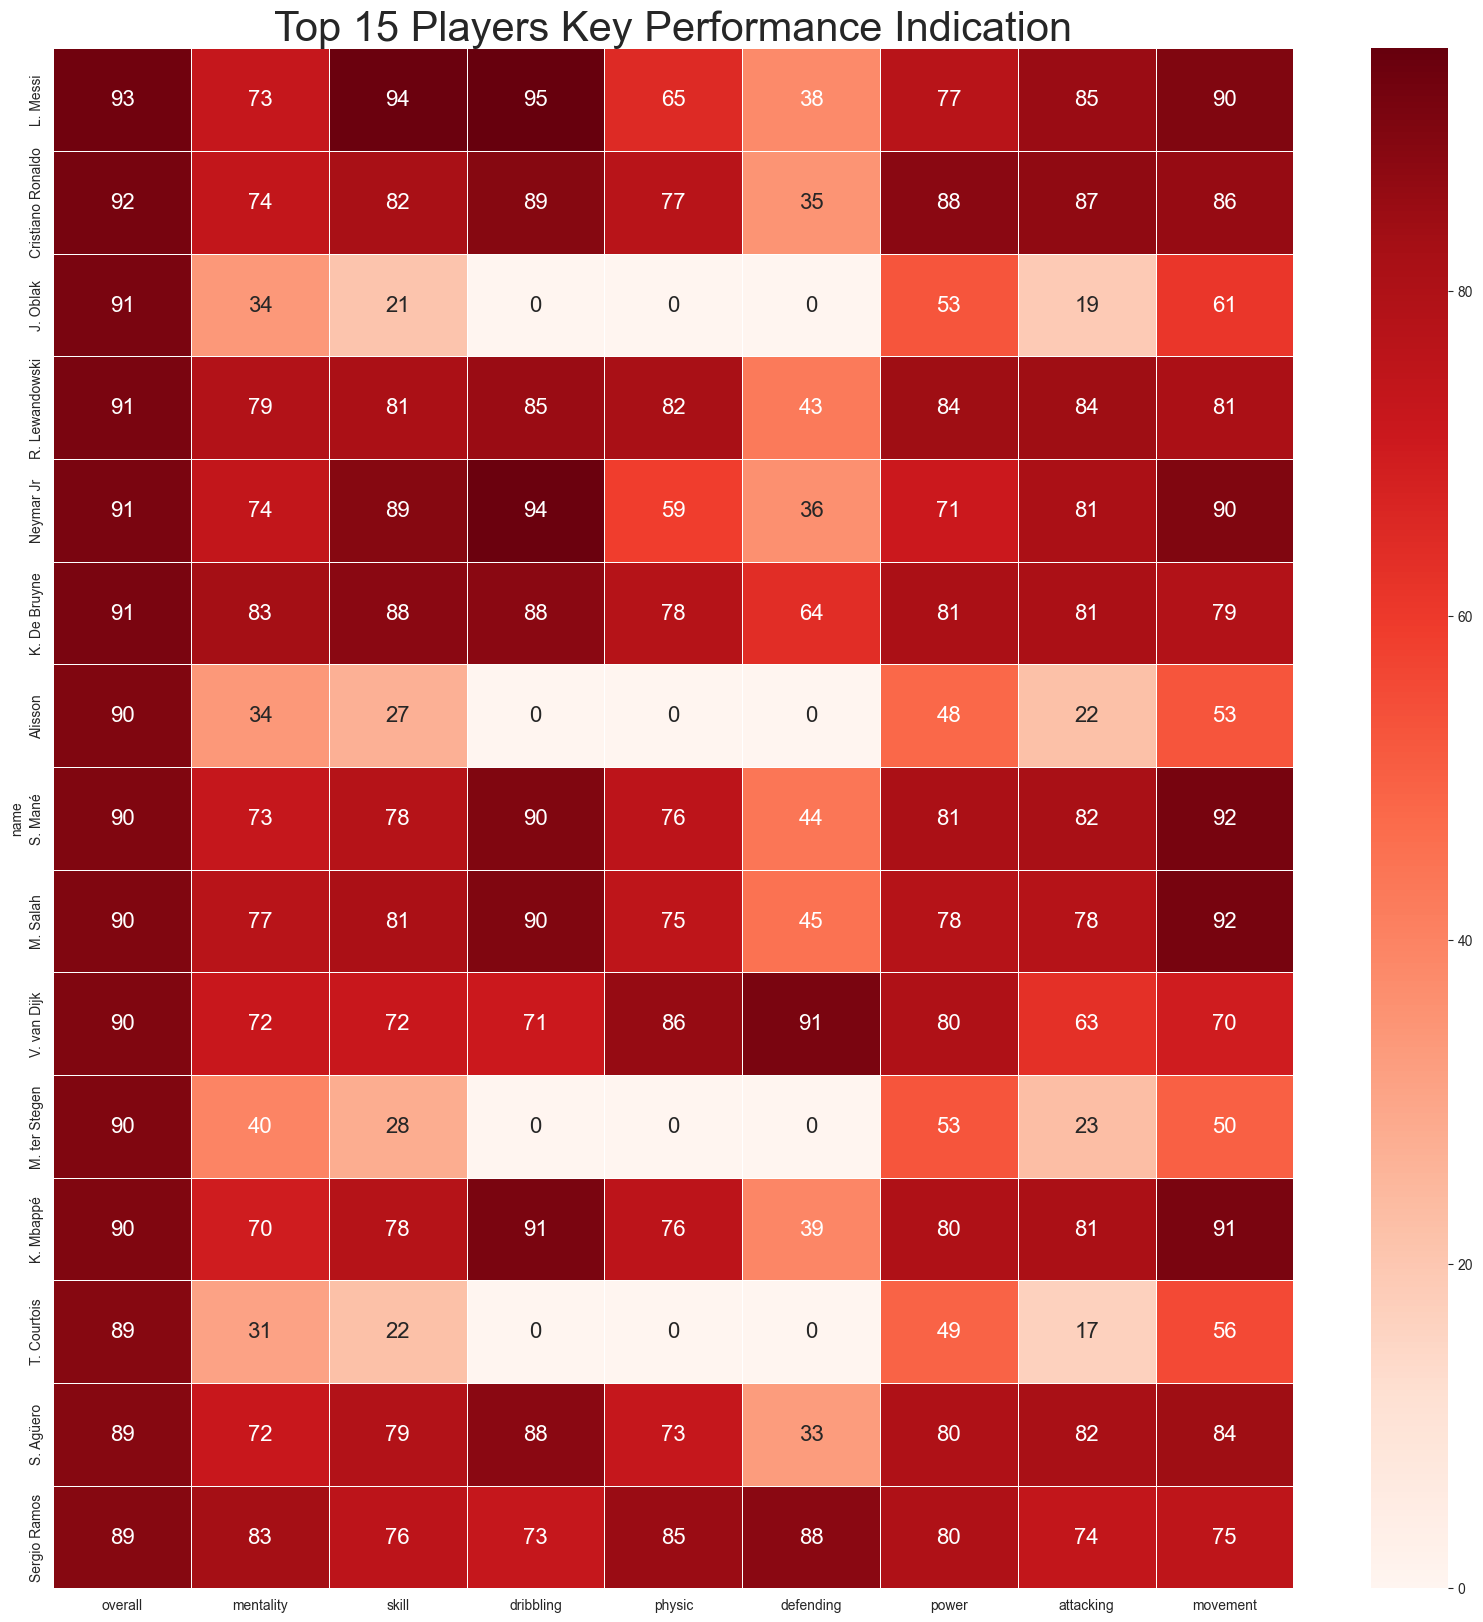

In [86]:
# creating the players dataset
top_15_players_df.set_index('name',inplace = True)
plt.figure(figsize=(20,20))
plt.title("Top 15 Players Key Performance Indication",fontsize=30)
ax=sns.heatmap(top_15_players_df,fmt='d',annot=True, linewidths=.5,cmap='Reds',annot_kws={"size": 16});

**What we can observe -**<br>
In each attributes we can find the top players like for example Ramos and Bruyne for mentality, Messi, Neymar and Mbappe for dribbling etc.

### Distribution of Players Mentality Aggression,Positioning and Vision

**Mentality Aggression -**  This parameter is based on how much the player is mentally aggressive.<br>
**Mentality Positioning -** This parameter is based on how a player can handle multiple positions while playing.<br>
**Mentality Vision -** This parameter is based on players mindset during match.

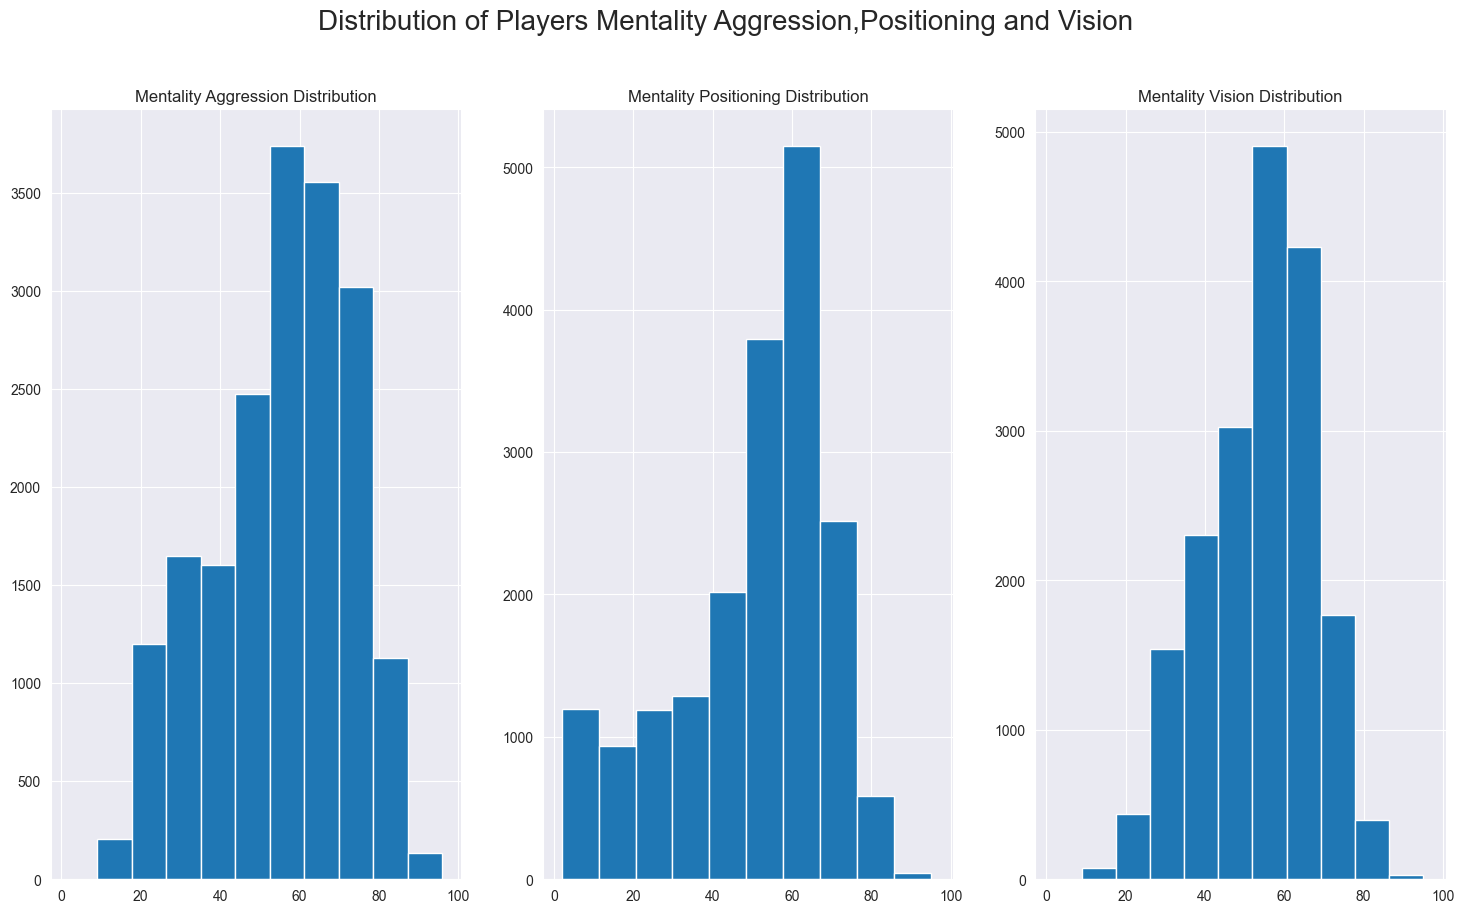

In [87]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,10))
fig.suptitle('Distribution of Players Mentality Aggression,Positioning and Vision',fontsize=20)
axes[0].set_title('Mentality Aggression Distribution')
axes[1].set_title('Mentality Positioning Distribution')
axes[2].set_title('Mentality Vision Distribution')
axes[0].hist(fifa_df.mentality_aggression)
axes[1].hist(fifa_df.mentality_positioning)
axes[2].hist(fifa_df.mentality_vision);

### Observations

**Maximum players have the mentality aggression  score of 60-70 in FIFA 21.**<br>
**More than 5000 players have better mentality vision  score of 50-70 in FIFA 21.**<br>
**More than 8000 players have mentality positioning score of 65-70.**

## Asking and Answering Questions

## Q1:  Who are the top 10 tallest players in FIFA 21?

In [88]:
top_10_tallest=fifa_df[fifa_df.height_cm>200].sort_values('height_cm',ascending=False).head(10)
top_10_tallest

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,mentality,skill,power,attacking,movement
10171,T. Holý,28,206,102,Czech Republic,Ipswich Town,English League One,3.0,65,67,...,68,60,56,65,69,23,19,37,17,37
4285,C. Pantilimon,33,203,96,Romania,Denizlispor,Turkish Süper Lig,1.0,71,71,...,67,71,72,70,72,33,20,42,19,39
11364,A. Ba,26,203,94,Mauritania,AJ Auxerre,French Ligue 2,2.0,64,67,...,9,11,13,12,15,47,35,51,45,40
18199,D. Thiam,22,202,87,Senegal,SPAL,Italian Serie B,2.0,53,65,...,53,52,62,61,51,14,13,38,9,43
6582,V. Milinković-Savić,23,202,92,Serbia,Torino,Italian Serie A,1.0,68,74,...,67,66,78,67,68,34,35,53,19,44
7337,K. Scherpen,20,202,85,Netherlands,Ajax,Holland Eredivisie,1.0,67,81,...,67,66,64,66,69,22,15,40,12,44
11569,S. Maierhofer,37,202,98,Austria,FC Admira Wacker Mödling,Austrian Football Bundesliga,1.0,64,64,...,14,12,15,6,11,67,45,58,61,36
1361,F. Forster,32,201,93,England,Southampton,English Premier League,1.0,76,76,...,76,72,65,75,80,34,20,47,18,45
17713,D. Turnbull,22,201,103,United States,Portsmouth,English League One,3.0,55,65,...,55,53,60,50,59,19,13,38,11,30
14452,R. Laidlaw,27,201,85,Scotland,Ross County FC,Scottish Premiership,1.0,61,64,...,63,59,56,61,59,21,15,34,12,29


In [3]:
for names in top_10_tallest.name: print(names)

NameError: name 'top_10_tallest' is not defined

**T. Holý** of **Czech Republic** is the tallest player in FIFA 21 with the height 206 cm.

## Question 2 : Is there any correlation between height and age of players in FIFA-21?

In [90]:
#Let's check if we can find any correlation between player's age and heights with respect to their preferred foots
height_cm_df=fifa_df['height_cm']    #height dataframe
age_df=fifa_df['age']                #age dataframe

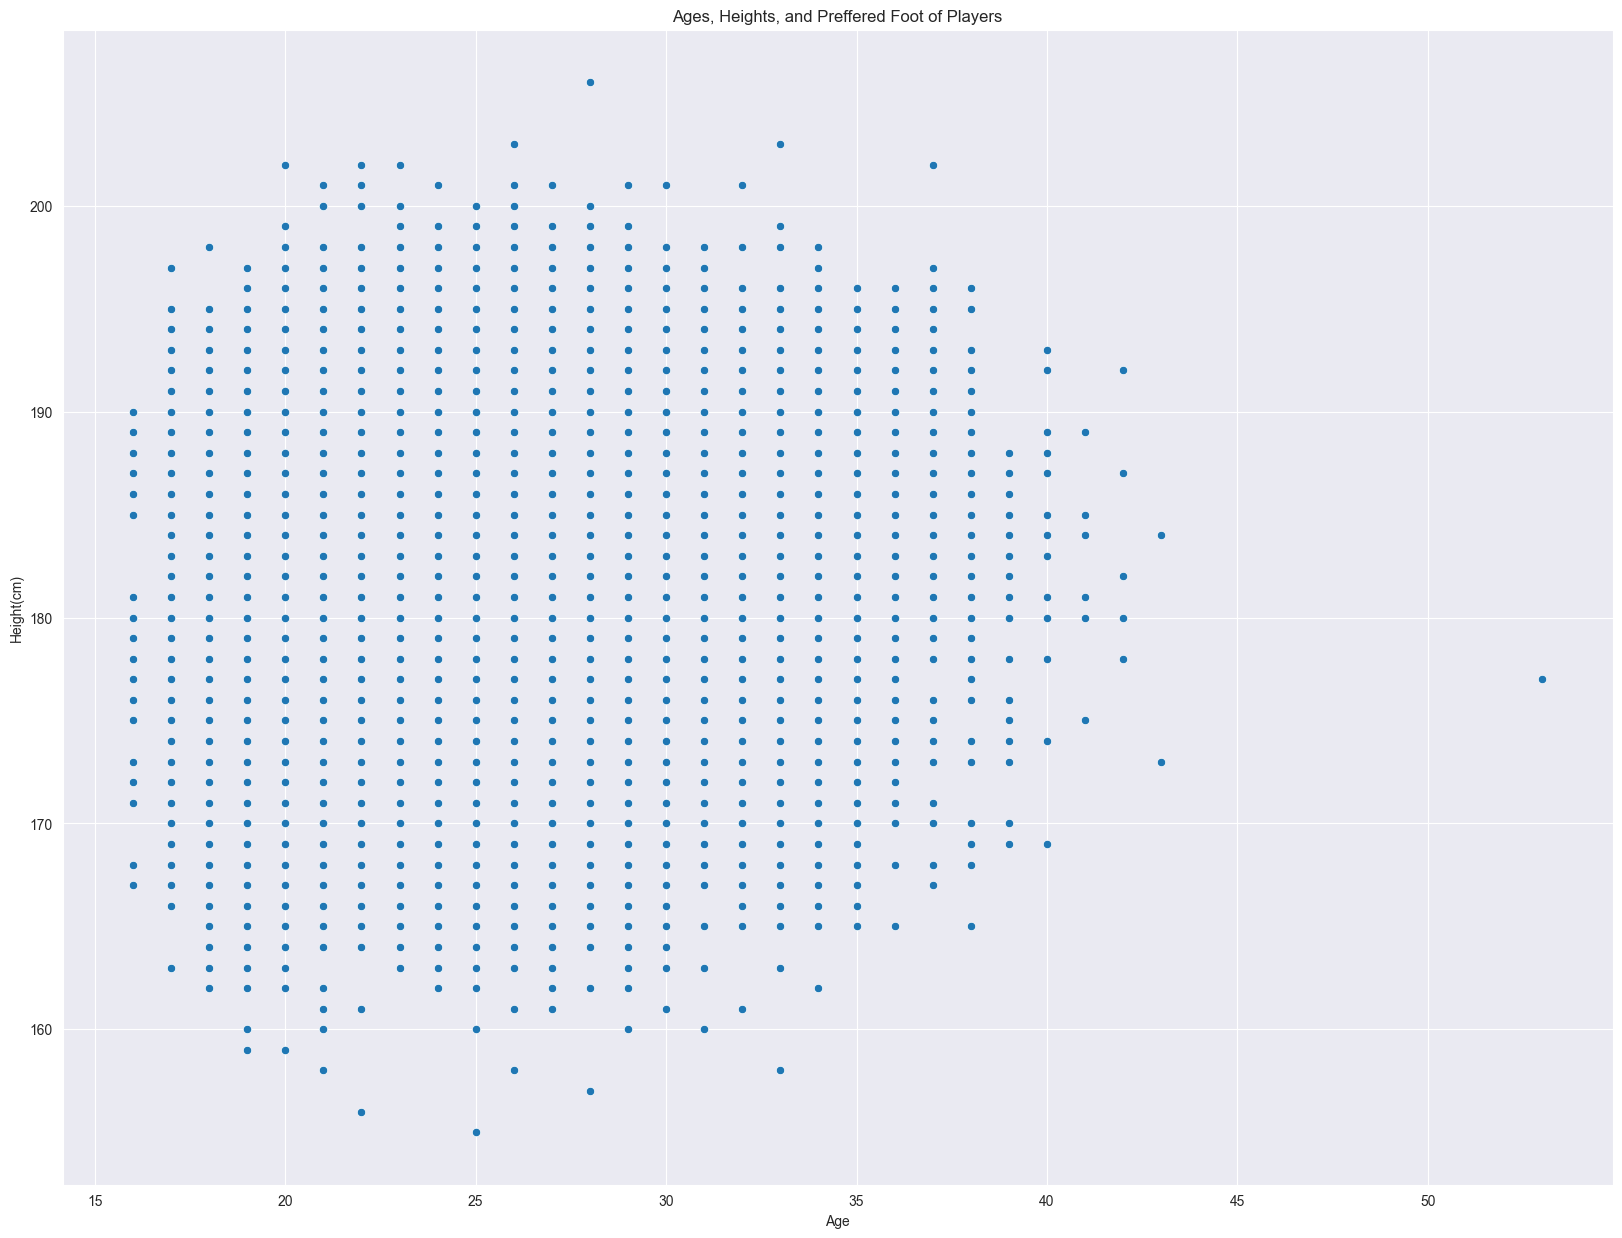

In [91]:
#Along with X-axis I take ages of the players
x_axis=age_df
##Along with Y-axis I take heights of the players
y_axis=height_cm_df
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
sns.scatterplot(x='age',y='height_cm',data=fifa_df)
#L-footed and R-footed players are seperated through hue
plt.xlabel('Age')
plt.ylabel('Height(cm)')
plt.title('Ages, Heights, and Preffered Foot of Players')
plt.show()

#### Observation ::
 1. The sort of correlation that can be visualized is that the [20-30] age group has the maximum peak heights like in between 180-200 (more than 200 cm) cm.<br>
 2. So if we compare R.footed players and L.footed players with respect to their heights then it is clearly visible that R.footed players are more taller than most of the L.footed players.

## Q3 : Who are the top 20 strongest players in FIFA 21?

In [8]:
strongest_df=fifa_df[['name','age','nationality','power_strength','player_positions','overall']].sort_values('power_strength',ascending=False).head(20)
strongest_df

,name,age,nationality,power_strength,player_positions,overall
10345,A. Akinfenwa,38,England,97,ST,65
11973,D. Dike,20,United States,96,ST,63
78,R. Lukaku,27,Belgium,95,ST,85
3937,A. Méndez,24,Uruguay,95,"RB, LB",71
6709,A. Vukotić,24,Serbia,95,CB,68
8851,J. Dawa Tchakonte,24,Cameroon,95,CB,66
6810,F. Ballas,27,Germany,94,CB,68
26,K. Koulibaly,29,Senegal,94,CB,88
11569,S. Maierhofer,37,Austria,94,ST,64
1613,P. Cissé,24,Senegal,94,CB,75


In [9]:
for names in strongest_df.name:print(names)

A. Akinfenwa
D. Dike
R. Lukaku
A. Méndez
A. Vukotić
J. Dawa Tchakonte
F. Ballas
K. Koulibaly
S. Maierhofer
P. Cissé
S. Coates
U. Ikpeazu
F. Carvalho
G. Kondogbia
T. Petrášek
O. Oularé
D. Zapata
Douglas Tanque
R. Torres
Vincente Dourado


## Q3 :  Which countries have the best under 19  potential in FIFA 21?

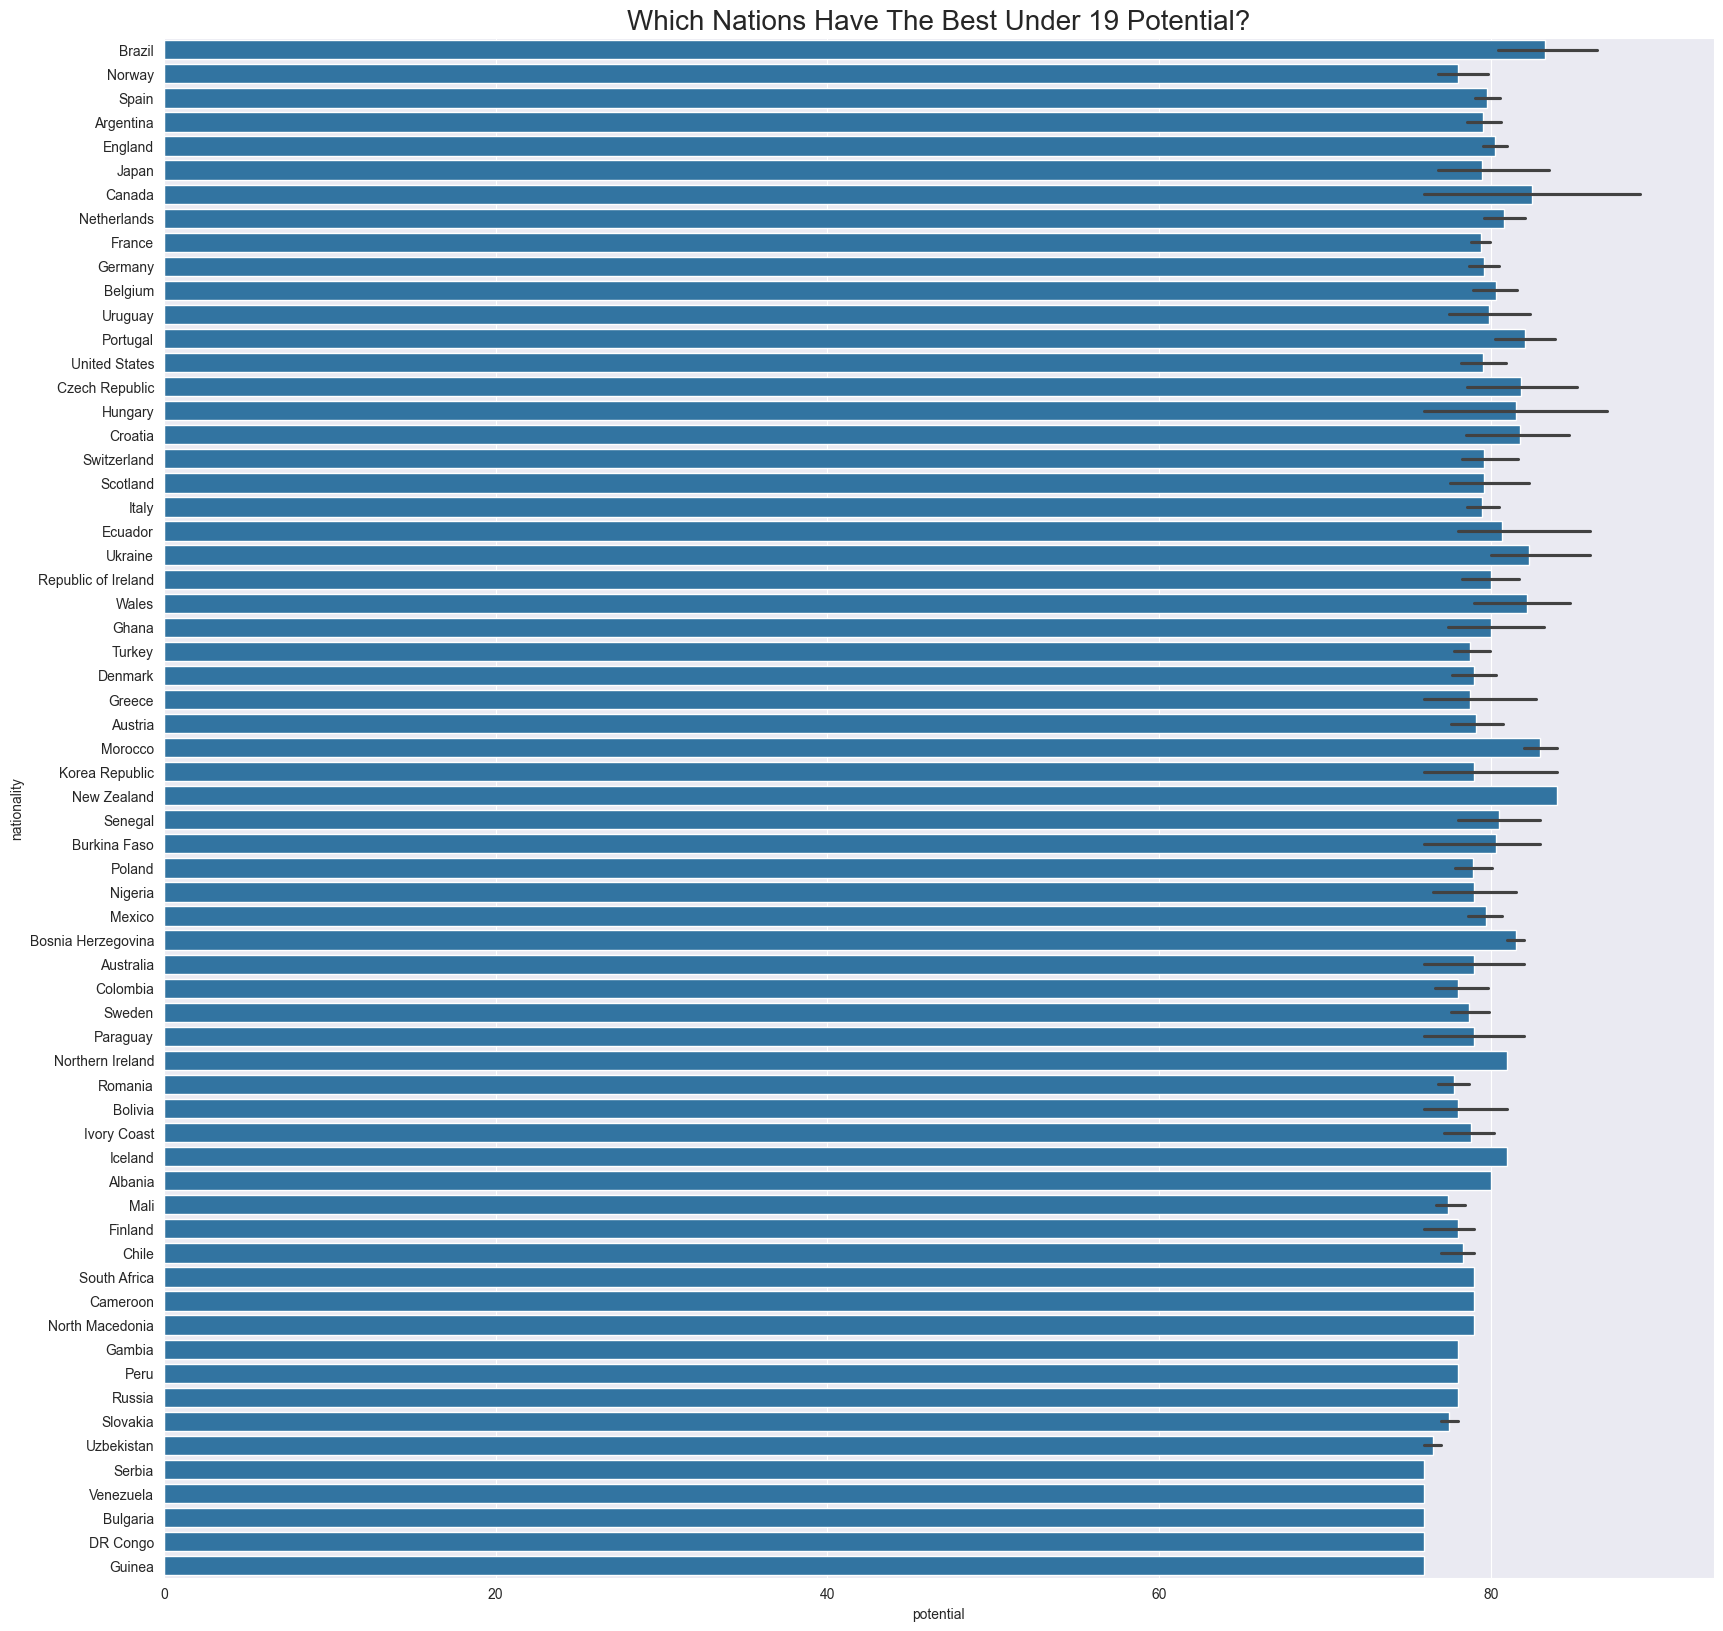

In [21]:
best_up=fifa_df[(fifa_df.potential>75) &(fifa_df.age<20)]
best_up=best_up.sort_values('potential', ascending = False)
best_up=best_up[['name','club_name','nationality','potential']]
x_axis=best_up['potential']
y_axis=best_up['nationality']
plt.figure(figsize=(20,20))
sns.barplot(x=best_up.potential, y=best_up.nationality, data=best_up)
plt.title('Which Nations Have The Best Under 19 Potential?',fontsize=20)
plt.show() 

**Brazil** has the maximum number of under 19 potentials with more than 80 in FIFA 21.

## Q4 : Which top 10 players have the ability to take long range shots with best accuracy in FIFA 21?

In [29]:
fifa_df['long_free_kick_pow_acc']=(fifa_df['power_long_shots']+fifa_df['skill_fk_accuracy']+fifa_df['power_shot_power']+fifa_df['shooting']+fifa_df['power_stamina']+fifa_df['power_strength'])//6
p_df=fifa_df[['name','age','nationality','long_free_kick_pow_acc','overall','club_name']].sort_values('long_free_kick_pow_acc',ascending=False).head(10)
p_df['long_free_kick_pow_acc']=p_df['long_free_kick_pow_acc'].astype(int)
p_df

,name,age,nationality,long_free_kick_pow_acc,overall,club_name
1,Cristiano Ronaldo,35,Portugal,86,92,Juventus
37,L. Suárez,33,Uruguay,85,87,FC Barcelona
3,R. Lewandowski,31,Poland,85,91,FC Bayern München
5,K. De Bruyne,29,Belgium,85,91,Manchester City
459,Hulk,33,Brazil,85,80,Shanghai SIPG FC
345,K. Volland,27,Germany,84,81,AS Monaco
591,R. Malinovskyi,27,Ukraine,84,79,Atalanta
30,Bruno Fernandes,25,Portugal,84,87,Manchester United
49,P. Pogba,27,France,84,86,Manchester United
0,L. Messi,33,Argentina,84,93,FC Barcelona


Looks like CR7 is the  best in case of taking long range shots with best accuracy in FIFA 21 , followed by Hulk, Lewandowski etc.

## Q5 : Compute Height vs Dribbling?

<Axes: title={'center': 'Height vs Dribbling'}, xlabel='Height', ylabel='Dribbling'>

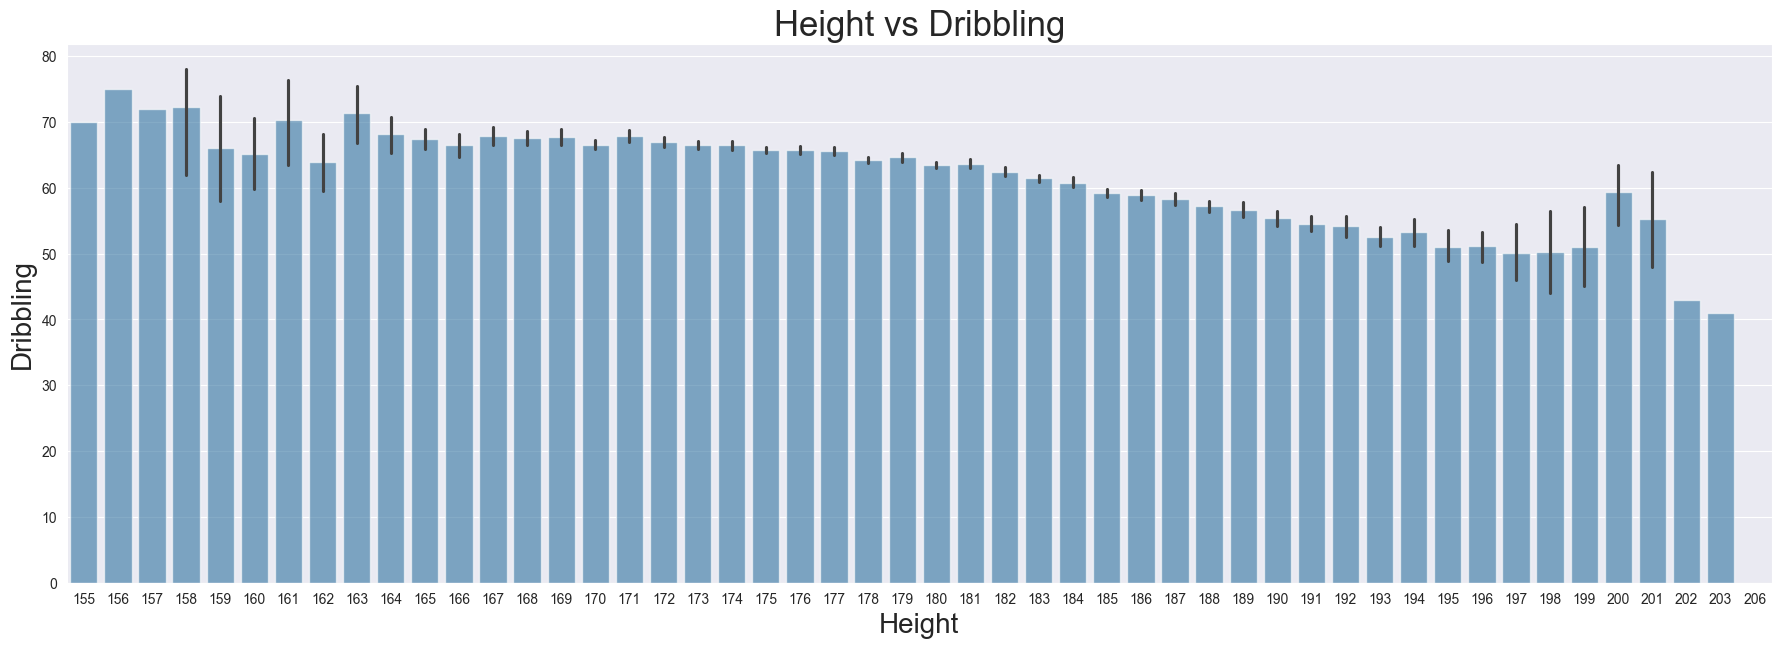

In [30]:
plt.figure(figsize = (22, 7))
plt.xlabel('Height', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Height vs Dribbling', fontsize = 25)
sns.barplot(x='height_cm', y='dribbling', data=fifa_df.sort_values('height_cm', inplace=False), alpha=0.6)

## Q6 : Compute Weight vs Dribbling?

<Axes: title={'center': 'Weight vs Dribbling'}, xlabel='Weight_kg', ylabel='Dribbling'>

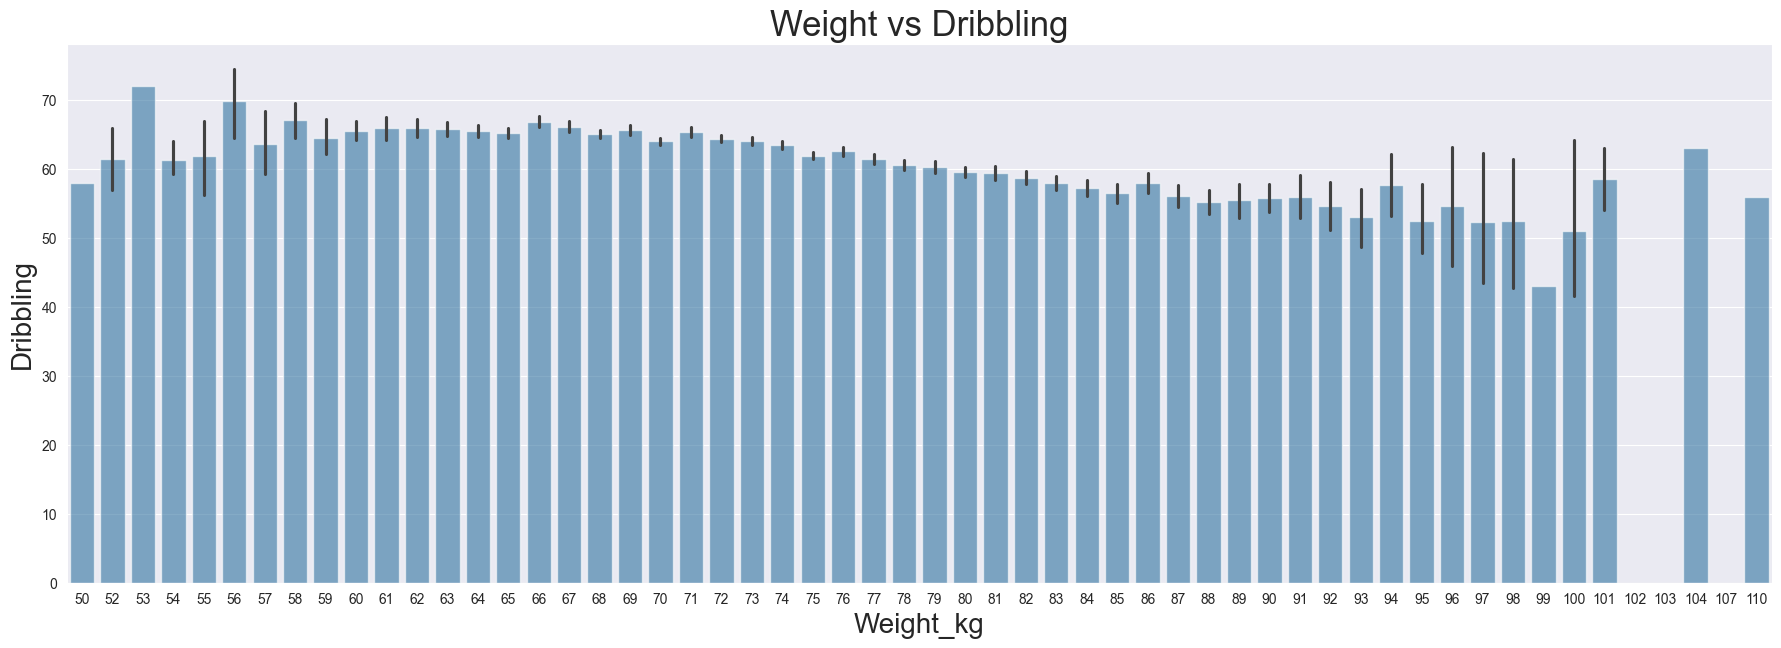

In [32]:
plt.figure(figsize = (22, 7))
plt.xlabel('Weight_kg', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Weight vs Dribbling', fontsize = 25)
sns.barplot(x='weight_kg', y='dribbling', data=fifa_df.sort_values('weight_kg'),alpha=0.6)

## Q7 : Compute the work rate of players in FIFA 2021 ?

C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_3912\2972989397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'work_rate', data = fifa_df, palette = 'hls')


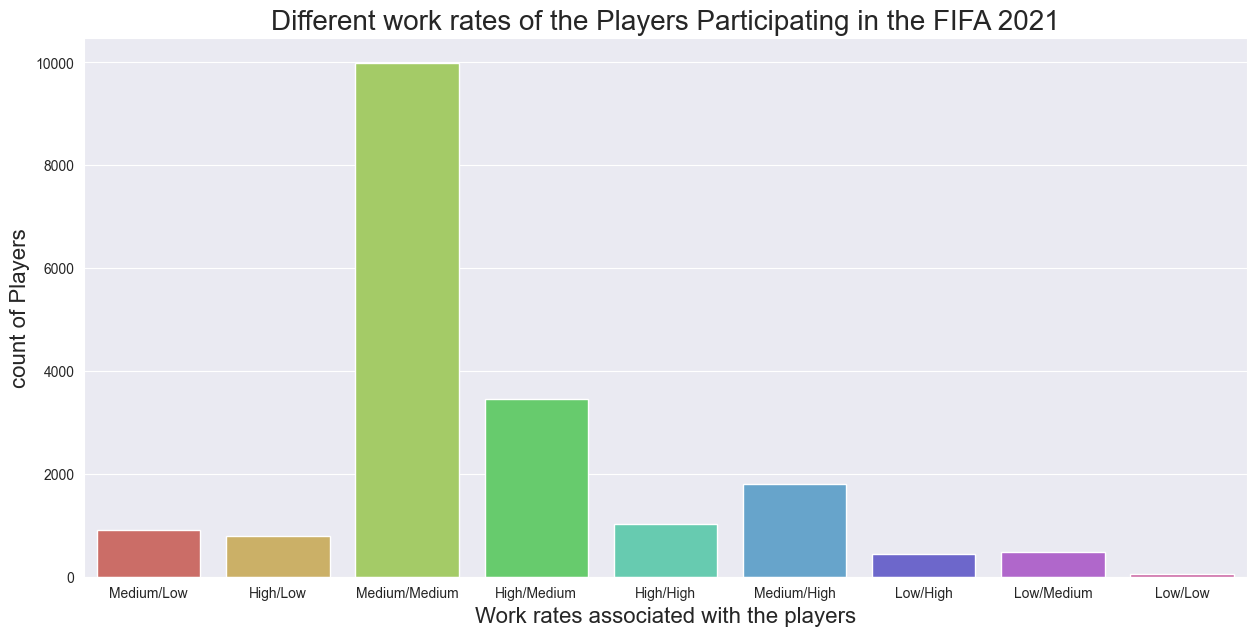

In [34]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'work_rate', data = fifa_df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2021', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

## Q7 : Compare the top 3 players based on Overall Skills ?

In [40]:
from IPython.display import display, HTML
display(
    HTML(fifa_df.sort_values('overall', ascending=False)[['name', 'overall']][:10].to_html(index=False)
))

name,overall
L. Messi,93
Cristiano Ronaldo,92
J. Oblak,91
R. Lewandowski,91
Neymar Jr,91
K. De Bruyne,91
Alisson,90
S. Mané,90
M. Salah,90
V. van Dijk,90


**Compairing Stats of Messi, Lewandowski & CR7**

In [41]:
#data.columns
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

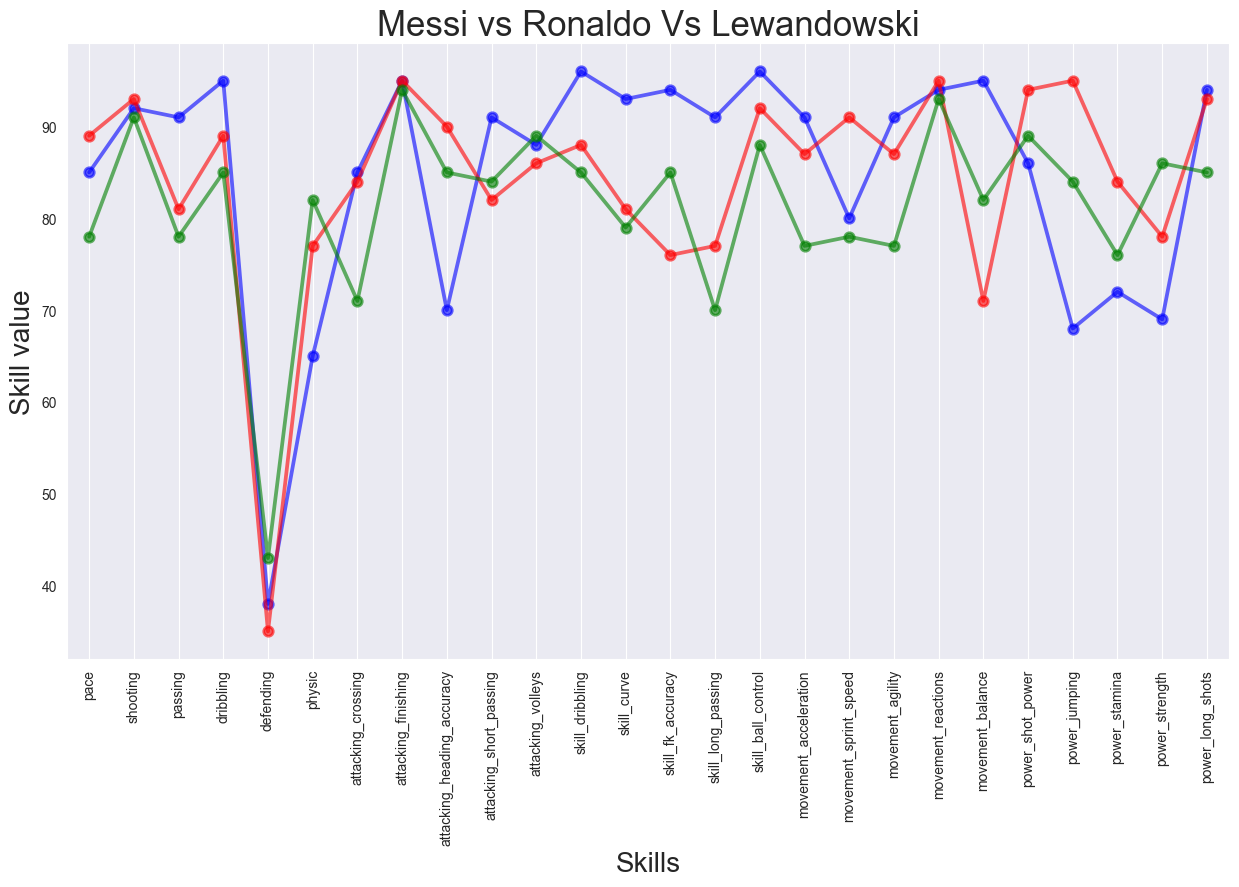

In [44]:
messi = fifa_df.loc[fifa_df['name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = fifa_df.loc[fifa_df['name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)
lewandowski = fifa_df.loc[fifa_df['name'] == 'R. Lewandowski']
lewandowski = pd.DataFrame(lewandowski, columns = skills)


plt.figure(figsize=(15,8))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)
sns.pointplot(data=lewandowski, color='green', alpha=0.6)

plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo Vs Lewandowski', fontsize = 25)
plt.grid()

## Q8 : Age Distribution of Players in Top Clubs ?

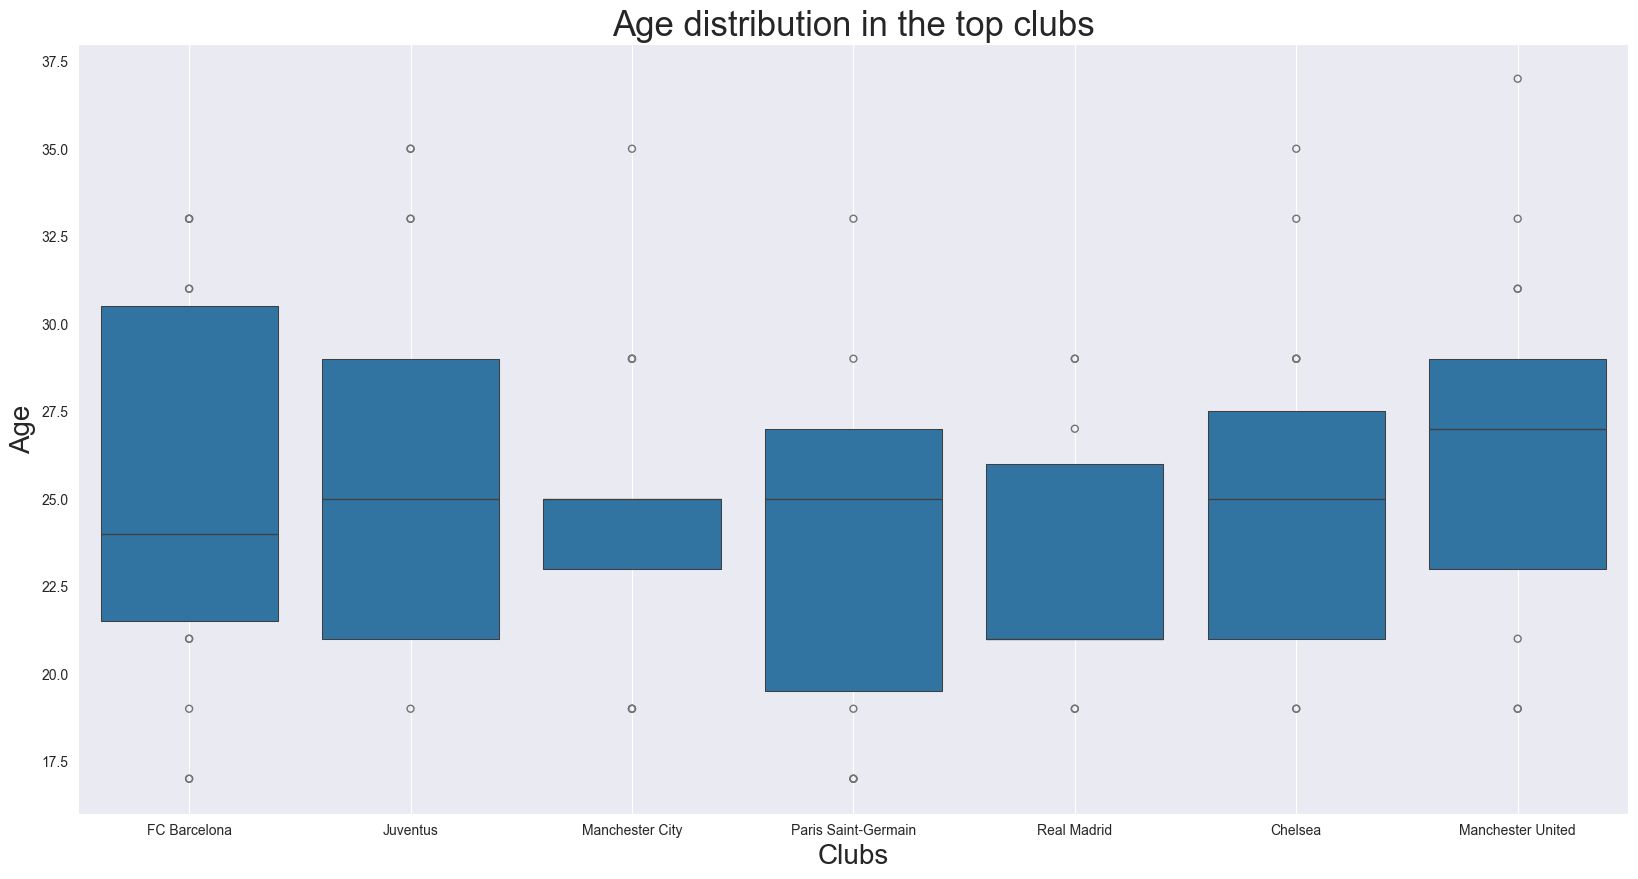

In [47]:
top_club_names = ('FC Barcelona','Real Madrid', 'Juventus', 'Paris Saint-Germain', 'Chelsea', 'Manchester City', 'Manchester United')
clubs = fifa_df.loc[fifa_df['club_name'].isin(top_club_names) & fifa_df['age']]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxenplot(x="club_name", y="age", data=clubs)
ax.set_title(label='Age distribution in the top clubs', fontsize=25)
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.grid()

## Q9 : Score of Top National Teams ?

In [48]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina','Belgium', 'France', 'Brazil', 'Italy', 'Columbia') # defining a tuple consisting of country names
data_countries = fifa_df.loc[fifa_df['nationality'].isin(some_countries) & fifa_df['overall']] # extracting the overall data of the countries selected in the line above
data_countries.head()

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,long_free_kick_pow_acc
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,84.0
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,78.0
5,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,85.0
12,T. Courtois,28,199,96,Belgium,Real Madrid,Spain Primera Division,1.0,89,90,...,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,NaN
13,S. Agüero,32,173,70,Argentina,Manchester City,English Premier League,1.0,89,89,...,58+3,58+3,58+3,60+3,56+3,51+3,51+3,51+3,56+3,81.0


C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_3912\1565999135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data_countries['nationality'], y = data_countries['overall'], palette = 'spring') # creating a bargraph


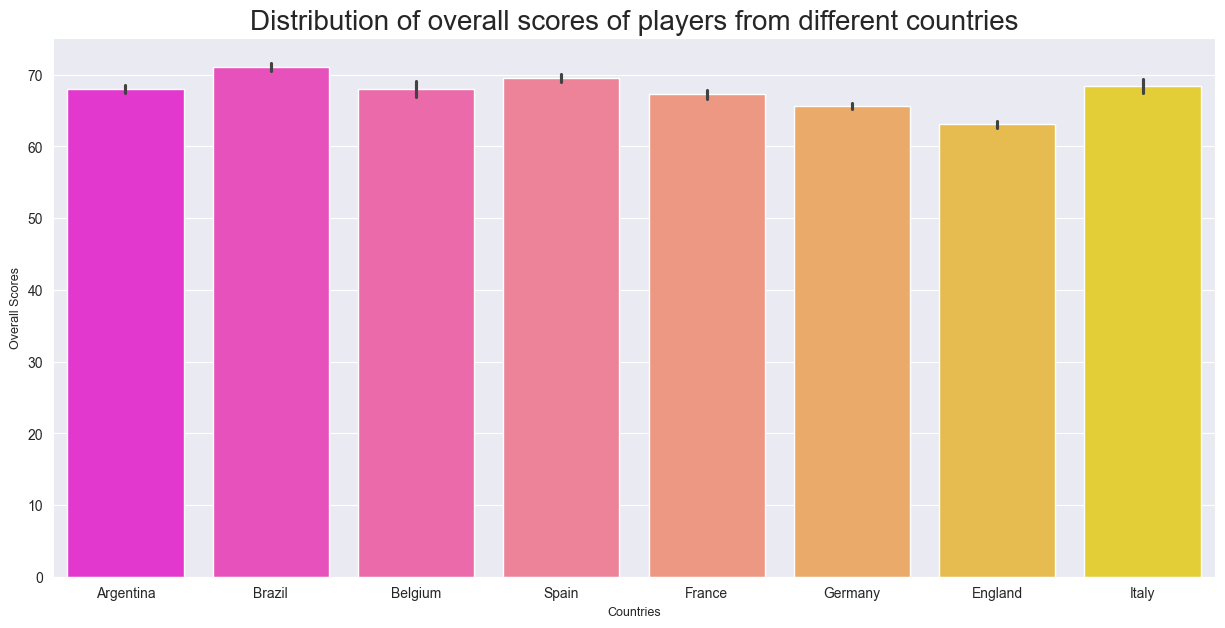

In [49]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['nationality'], y = data_countries['overall'], palette = 'spring') # creating a bargraph
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

## Q10 : Scores Comparison of Clubs ?

In [50]:
some_clubs = ('Manchester United', 'Liverpool', 'FC Bayern München', 'Atlético Madrid', 'Juventus', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Paris Saint-Germain', 'Chelsea', 'Real Madrid') # creating a tuple of club names

data_clubs = fifa_df.loc[fifa_df['club_name'].isin(some_clubs) & fifa_df['overall']] # extracting the overall data of the clubs selected in the line above

data_clubs.head()

,name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,long_free_kick_pow_acc
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,84.0
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,NaN
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,85.0
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,78.0
12,T. Courtois,28,199,96,Belgium,Real Madrid,Spain Primera Division,1.0,89,90,...,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,NaN


C:\Users\Syed Muhammad Muneeb\AppData\Local\Temp\ipykernel_3912\3554384511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data_clubs['club_name'], y = data_clubs['overall'], palette = 'inferno') # creating a barplot


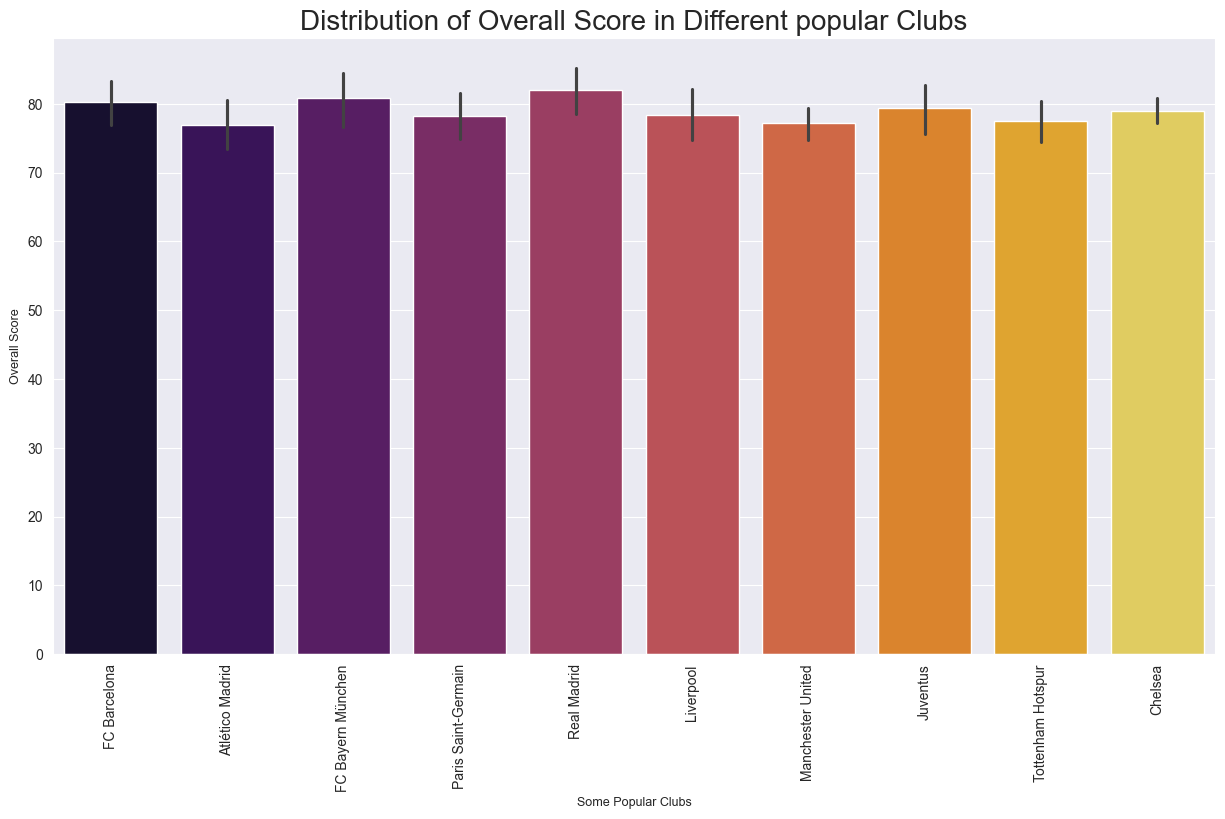

In [51]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.barplot(x = data_clubs['club_name'], y = data_clubs['overall'], palette = 'inferno') # creating a barplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

## Q11 : Which Team has most number of Over Performing Players ?

In [52]:
import plotly.express as px
cnt_best_avg=fifa_df.groupby('club_name').apply(lambda x:np.average(x['overall'])).reset_index(name='Overall Ratings')
cnt_best_cnt=fifa_df.groupby('club_name').apply(lambda x:x['overall'].count()).reset_index(name='Player Counts')
snt_best_avg_cnt=pd.merge(cnt_best_avg,cnt_best_cnt,how='inner',left_on='club_name',right_on='club_name')
sel_best_avg_cnt=snt_best_avg_cnt[snt_best_avg_cnt['Player Counts']>=25]
sel_best_avg_cnt.sort_values(by=['Overall Ratings','Player Counts'],ascending=[False,False])
px.scatter(sel_best_avg_cnt,x='Player Counts',y='Overall Ratings',color='Player Counts',size='Overall Ratings',hover_data=['club_name'],title='Clubwise player counts and Average Rating')

## Inferences and Conclusion

After the analysis I have computed many interesting conclusions from this dataset.Some of are ---- <br>
- There are total <b>18719</b> players who particiapted in FIFA 21.<br>
- There are total <b>161</b> different countries from where there are players in FIFA 21. Out of which England,Germany and Spain these 3 countries has more than <b>1000</b> players. <br>
- The range of ages of the players is between <b>16</b> and <b>53</b><br>
- The range of weights(in kg) of the players is between <b>50</b> and <b>110</b><br>
- The maximum potential of the players : <b>95</b><br>
- The minimum potential rating of the players : <b>47</b><br>
- The maximum overall rating of the players : <b>93</b><br>
- The minimum overall rating of the players : <b>47</b><br>
- The average potential rating of players : <b>71.22</b><br>
- The average overall rating of players : <b>65.77</b><br>
- The range of heights(in cm) of the players is between <b>155</b> and <b>203</b><br>
- The range of values(in eur) of the players is between <b>1.666600e+04</b> and <b>1.055000e+08</b><br>
- <b>L. Messi</b> is the only player in FIFA 21 right now who has won individual 6 Ballon d'OR awards and it's a record followed by Ronald <br>
- Out of all players, <b>92.88%</b> players have international reputation of 1 in FIFA 21<br>
- **Center Back** is the most played position in FIFA 21.<br>
- <b>Spain</b> is the only country which more than 20 L-Footed players with best long range shooting accuracy.<br>
- England,Germany and Spain are major countries in case of number of players.Because these 3 countries individually more than 1000 player in FIFA 21<br>
**There is no particular playing position of maximum players because depending upon the situation of game,player's playing position also does change.So,we can't select a single playing position for each player in FIFA 21.**<br>
- More than <b>7000</b> players in FIFA 21 are in the age group between <b>20-25.</b><br>
- Between *15-25* players have more potential than their overall.It is expected that these age group players can perform better in their upcoming matches in FIFA 21.